In [1]:
'''THIS NOTEBOOK ALLOWS YOU TO PLOT MAIN DATA FIGURES THAT RELATE TO OUR NEURAL RESULTS'''
%load_ext autoreload
%autoreload 2

from functions import functions_cells_regress as regs
from functions import functions_cells_rsa as rsas
from functions import functions_cells_decode as dec
from functions import functions_cells_svd as SVD
from functions import functions_cells_policy as pol
from functions import plot_neurons as plot_n
from scipy import io
import numpy as np

def import_cell_data(path):
    'Import neural data.'
    HP = io.loadmat(path +'/data_recordings/HP.mat')
    PFC = io.loadmat(path + '/data_recordings/PFC.mat')
    
    'Import neual data after accounting for physical movements.'
    HP_dlc = io.loadmat(path +'/data_recordings/after PCA /HP_dlc_pca.mat')
    PFC_dlc = io.loadmat(path + '/data_recordings/after PCA /PFC_dlc_pca.mat')
    
    return HP, PFC, HP_dlc, PFC_dlc


In [2]:
'''Edit your path to the data folder and import neural data here. 
  HP and PFC will contain raw neural data.
  HP_dlc and PFC_dlc will contain neural data after accounting for fine physical movements using DeepLabCut data.'''

your_path_to_data = 'data_share/'
HP, PFC, HP_dlc, PFC_dlc =  import_cell_data(your_path_to_data)

'''perms parameter determines the number of permutations to sessions to run (used in most of the Main Figures below);
   paper used n_perms = 5000 but such high numbers will take a long time to run.'''
perms = 100


In [3]:
PFC['Data'][:,0][0].shape

(424, 15, 63)

###
sess_id=2, neur_id=5
sess_id=3, neur_id=4,5,6,9,10
sess_id=5, neur_id=8,12
sess_id=7, neur_id=0,2,6,7 ***
sess_id=9, neur_id=0
sess_id=11, neur_id=4
sess_id=16, neur_id=0
sess_id=19, neur_id=2
sess_id=21, neur_id=1,5,7


In [4]:
weird_ones = {'2': [5],
              '3': [4,5,6,9,10],
              '5': [8,12],
              '7': [0,1,2,6,7],
              '9': [0],
              '11': [4],
              '16': [0],
              '19': [2],
              '21': [1,5,7], 
              '25': [7,14],
              '26': [5],
              '28': [9,12],
              '29': [0,2],
              '30': [15],
              '31': [15],
              '32': [1,3,12],
              '33': [16,17,18],
              '34': [0],
              '35': [0,13],
              '36': [1],
              '38': [16],
              '40': [7,22],
              '41': [7],
              '42': [2,8,12],
              '43': [0,8,18],
              '44': [3]}

In [ ]:
''' Fig 2 | To plot the firing rate for any neuron from any session changing the indexing variables below. '''
sess_id = 44
n_neur = PFC['Data'][:, sess_id][0].shape[1]
import matplotlib.pyplot as plt
for neur_id in range(n_neur+10):
    # if neur_id==5:
    plot_n.plot_neuron(PFC, session_id = sess_id, neuron_ID = neur_id)
    plt.title('neur_id ' + str(neur_id))

In [ ]:
''' Fig 2 | To plot the firing rate for any neuron from any session changing the indexing variables below. '''
for sess_id, neur_ids in weird_ones.items():
    # if neur_id==5:
    print(sess_id)
    print(int(sess_id))
    for neur_id in neur_ids:
        plot_n.plot_neuron(PFC, session_id = int(sess_id), neuron_ID = neur_id)
        plt.title('sess_id ' + str(sess_id) + ', neur_id ' + str(neur_id))

In [ ]:
'''Fig 4B | CPDs from linear regression for choice, outcome and outcome × choice regressors in PFC and CA1.
   Significance levels for within-region effects were based on a two-sided permutation test where firing rates
   were rolled with respect to trials. Significance levels for differences between regions were based on a two-sided permutation test
   across sessions. All significance levels were corrected for multiple comparison over timepoints.''' 
regs.plot_simple_GLM(HP,PFC, n_perm = perms, animal_perm = False)


In [ ]:
'''Fig 4E | CPDs in a regression analysis modeling the pattern of representation similarities using the RDMs shown in 4D.
   The time course is given by sliding the windows associated with choices from being centred on choice port entry to 0.76 seconds after choice port entry while holding
   time windows centred on trial initiations fixed.
   
   Fig 4C | Representation similarity at ‘choice time’ (left) and ‘outcome time’ (right), quantified as the Pearson correlation between the demeaned neural activity vectors for each pair of conditions. 
   
   Fig 4D |  RDMs used to model the patterns of representation similarity observed in the data. Each RDM codes the expected pattern of similarities among categories in c under
   the assumption that the population represents a given variable.'''
rsas.RSA_across_time_plot(HP, PFC, perm_n = perms, dlc = False)


In [ ]:
'''Fig 4F | Confusion matrices from linear decoding of position in trial, using a decoder that was trained on one problem and tested on another, averaged
   across animals and across all problem pairs. Colored squares indicate three possible patterns of decoding that indicate different neuronal content. Blue
   indicates correct cross-task decoding to the same abstract state (for example, B choice decodes to B choice). Red indicates decoding to a different state
   that could have occurred at the same sequential position in the trial (for example, B choice decodes to A choice). Dashed green corresponds to decoding to
   the same physical port for those training and test layouts where the Initiation and B choice ports interchanged (for example, B choice decodes to Initiation
   when the decoder was trained on layout 2 and tested on layout 3).

   Fig 4G | Bar plots showing the probability of the cross-task decoder outputting the correct
   abstract state, the other state that can have the same position in the trial sequence and the state that has the same physical port as the
   training data (computed only from confusion matrices where B choice and initiation ports interchange) computed using the corresponding
   cells highlighted in 4F'''
dec.plot(HP, PFC)


In [ ]:
'''Fig 4B - first temporal mode from the SVD decomposition of data matrix from PFC plotted in each problem separately for clarity and separated by A (green) and B (pink) rewarded (solid) and
   non-rewarded (dashed) choices. 
    
   Fig 4C - first cellular mode from SVD decomposition of data matrix from PFC in each problem showing that similar patterns of
   cells participate in all problems. 

   Fig 4E Variance explained when using temporal activity patterns to predict either activity from the same problem and brain region (solid lines) or a different brain region (and, therefore, different animal) and the same problem (dashed lines) D2. f, Variance explained
   when using cellular activity patterns U1 from one problem to predict either held-out activity from the same problem (solid lines) or activity from a different
   problem (dashed lines).'''
SVD.plot_example_patterns(PFC)
SVD.svd_between_brains(HP_dlc,PFC_dlc, inds = np.arange(64))


In [ ]:
 '''Fig 4D - variance explained when using temporal activity patterns from one problem to predict either held-out activity from
    the same problem (solid lines) or activity from a different problem (dashed lines).
    
    Fig 4D - variance explained when using cellular activity patterns from one problem to predict either held-out activity from
    the same problem (solid lines) or activity from a different problem (dashed lines).
    
    Fig 4G - cumulative weights along the diagonal Σ using pairs of temporal V1 and cellular U1 activity patterns from one problem to predict either 
    held-out activity from the same problem (solid lines) or activity from a different problem (dashed lines). Weights were normalized by peak cross-validated cumulative weight computed
    on the activity from the same problem. 
    
    Fig 4H- G - areas between the dashed and solid lines in D,F and G.'''
SVD.plot_main_figure(HP, PFC, HP_dlc, PFC_dlc, n_perms = perms)


In [ ]:

'''Fig 6A - weights from logistic regression predicting choices in recording sessions using choices, rewards and choice
   × reward interactions over the previous 12 trials as predictors.''' 
pol.plot_policy_during_recordings(PFC,HP, n = 12)

'''Fig 6B - CPDs from regression models predicting neural activity using current trial events, subjects’ policy (estimated using the behavioral regression in a) and policy interacted with current
   choice. Stars denote the timepoints at which each regressor explained significantly more variance than expected by chance (permutation test based on
   rolling firing rates with respect to trials, P < 0.001, corrected for multiple comparisons; for more details on permutation tests, see the ‘Statistical significance’
   section).'''
pol.plot_policy_simple_GLM(HP,PFC, n_perm = 1, n = 11, dlc = False)


In [ ]:
'''Fig 6C -  correlations across problems between policy weights in regressions predicting neural activity. Regressions were run separately for A (left panels)
   and B (right panels) choices in each problem and at each timepoint across the trial. Correlations of policy representations between all problem pairs were
   evaluated for each pair of timepoints; values on the diagonal show how correlated policy representation was at the same timepoint in both problems. Positive
   correlation indicates that the same neurons coded policy with the same sign in both problems.'''
pol.plot_correlations_slice(PFC, HP, n = 11, c_1 = 1, perm_n = perms, dlc = False, animal_perm = False)

'''Fig 6D - To quantify whether policy generalized more strongly between problems in PFC than CA1, we computed the between-region difference in the sum along the diagonal of the correlation matrices in c, separately
    for A and B choices, and compared it against the null distribution obtained by permuting sessions between brain regions. Policy representation on both A
    and B choices generalized more strongly in PFC than CA1. e, Slices through the correlation matrices at initiation (left), choice (center) and outcome (right)
    times for A (solid) and B (dashed line) choices. Significant differences between conditions are indicated by stars as shown in the legend.'''
pol.plot_diagonal_sums(HP, PFC, perm_n = perms, dlc = False)


In [396]:
import numpy as np
import scipy

exp = exp_rec[0]

X_sessions, y_sessions = [], []
n = 11 # this number was selected based on significance testing after training 
subject_IDs = exp.subject_IDs; n_subjects = len(subject_IDs); coef_subj = [] # list to store regression coefficients
print(subject_IDs, n_subjects)

for n_subj, subject_ID in enumerate(subject_IDs):
    subject_sessions = exp.get_sessions(subject_IDs=[subject_ID])
    results_task = [];  results_session = [] # regression coefficients for tasks and sessions    
    for j, session in enumerate(subject_sessions):
        choices = session.trial_data['choices']
        all_sessions = len(subject_sessions)-1 # to store last session
        configuration = session.trial_data['configuration_i'] 
        if j == 0:
            previous_session_config = configuration[0] # if first session find poke configuration 
            
        elif configuration[0]!= previous_session_config: # check if configuration changed in this session 
            previous_session_config = configuration[0]  
            results_task.append(np.mean(results_session,0)) # append results if configuration changed
            
        if len(choices) > n*3: # check there is enough trials for regression in that session
            reward = session.trial_data['outcomes'] # rewards
            previous_rewards = scipy.linalg.toeplitz(reward, np.zeros((1,n)))[n-1:-1] # find rewards on n-back trials
            previous_choices = scipy.linalg.toeplitz(choices, np.zeros((1,n)))[n-1:-1] # find choices on n-back trials
            interactions = scipy.linalg.toeplitz((((choices-0.5)*(reward-0.5))*2),np.zeros((1,n)))[n-1:-1] #interactions rewards x choice
            choices_current = (choices[n:]) # current choices need to start at nth trial
            ones = np.ones(len(interactions)).reshape(len(interactions),1) # add constant
            X = (np.hstack([previous_rewards,interactions,ones])) # create design matrix

            X_sessions.append(X)
            y_sessions.append(choices_current[:, np.newaxis])

            print(j, choices.shape, choices_current.shape, X.shape)

NameError: name 'exp_rec' is not defined

In [32]:
from functions import functions_cells_grid as grid

values, values_by_task = grid.glm_values(PFC, use_choices=False)

True
True
True
Train : 67.6
Test : 68.1


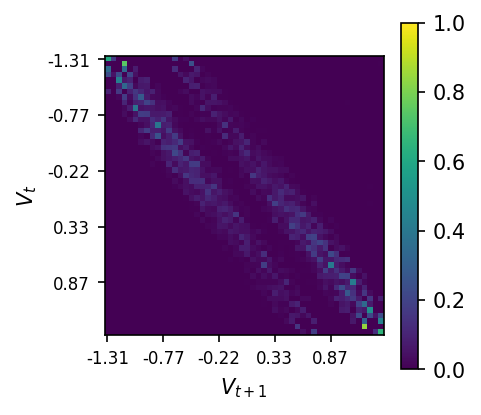

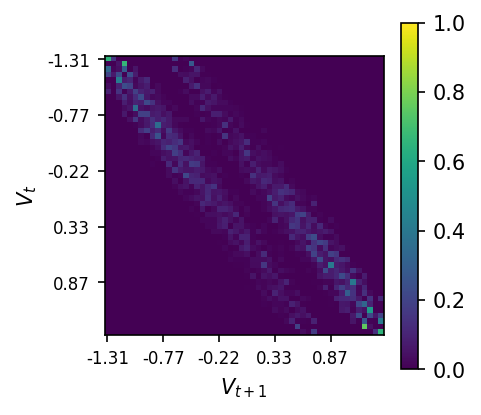

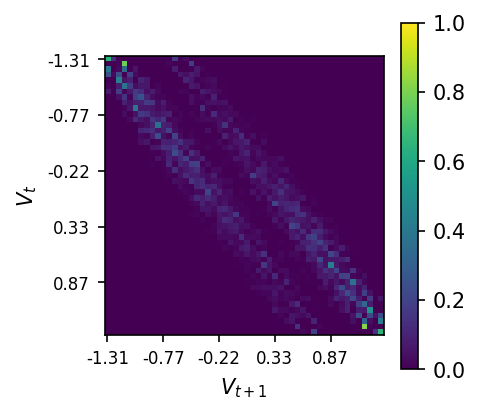

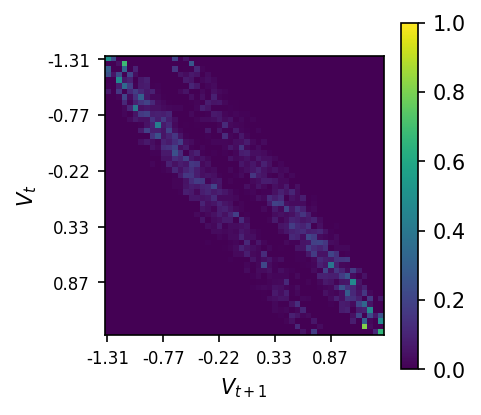

In [31]:
# grid.value_transition_matrix(values)
grid.value_transition_matrix(values)
grid.value_transition_matrix(values_by_task[0])
grid.value_transition_matrix(values_by_task[1])
grid.value_transition_matrix(values_by_task[2])

Train : 67.6
Test : 68.1
[(391,), (392,), (527,), (449,), (528,), (397,), (397,), (357,), (330,), (545,), (459,), (361,), (493,), (527,), (355,), (337,), (501,), (437,), (557,), (393,), (412,), (326,), (372,), (444,), (548,), (422,), (419,), (353,), (445,), (436,), (619,), (394,), (585,), (430,), (445,), (450,), (442,), (420,), (539,), (520,), (430,), (762,), (514,), (324,), (322,)]
[(391,), (392,), (527,), (449,), (528,), (397,), (397,), (357,), (330,), (545,), (459,), (361,), (493,), (527,), (355,), (337,), (501,), (437,), (557,), (393,), (412,), (326,), (372,), (444,), (548,), (422,), (419,), (353,), (445,), (436,), (619,), (394,), (585,), (430,), (445,), (450,), (442,), (420,), (539,), (520,), (430,), (762,), (514,), (324,), (322,)]


AttributeError: 'bool' object has no attribute 'all'

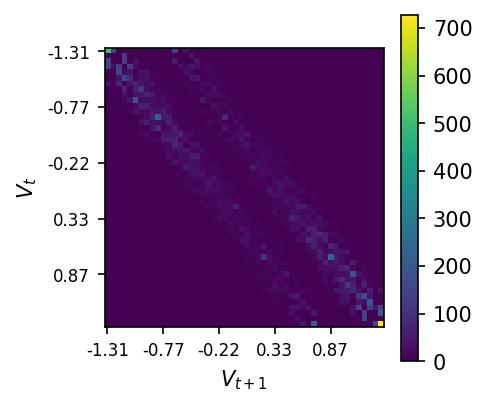

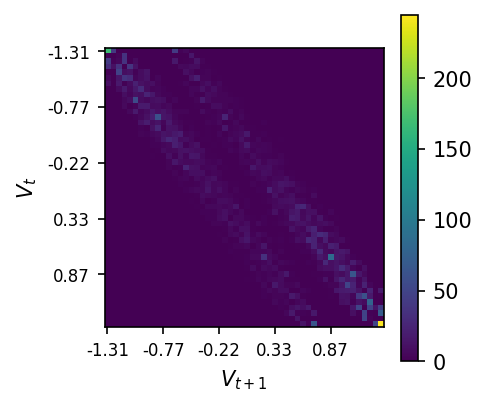

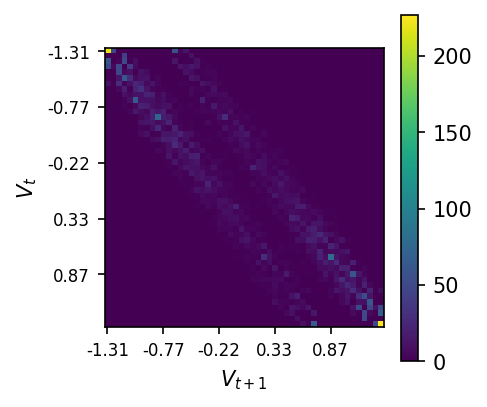

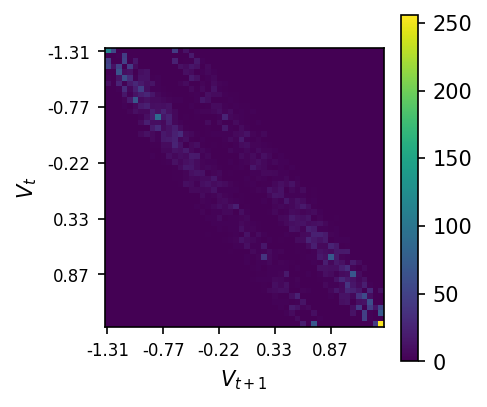

In [69]:
values, values_by_task = grid.glm_values(PFC, use_choices=False)
print([_.shape for _ in values])


values_aug = [np.concatenate([v1, v2, v3]) for v1, v2, v3 in zip(values_by_task[0], values_by_task[1], values_by_task[2])]
print([_.shape for _ in values_aug])
# this checks if the concatenated values (in a specific order) are the same as the entire values
a = [all(v_aug == v) for v_aug, v in zip(values_aug, values)]

values_aug = [np.concatenate([v1, v3, v2]) for v1, v2, v3 in zip(values_by_task[0], values_by_task[1], values_by_task[2])]
b = [all(v_aug == v) for v_aug, v in zip(values_aug, values)]

values_aug = [np.concatenate([v2, v1, v3]) for v1, v2, v3 in zip(values_by_task[0], values_by_task[1], values_by_task[2])]
c = [all(v_aug == v) for v_aug, v in zip(values_aug, values)]

values_aug = [np.concatenate([v2, v3, v1]) for v1, v2, v3 in zip(values_by_task[0], values_by_task[1], values_by_task[2])]
d = [all(v_aug == v) for v_aug, v in zip(values_aug, values)]

values_aug = [np.concatenate([v3, v1, v2]) for v1, v2, v3 in zip(values_by_task[0], values_by_task[1], values_by_task[2])]
e = [all(v_aug == v) for v_aug, v in zip(values_aug, values)]

values_aug = [np.concatenate([v3, v2, v1]) for v1, v2, v3 in zip(values_by_task[0], values_by_task[1], values_by_task[2])]
f = [all(v_aug == v) for v_aug, v in zip(values_aug, values)]

# we need to check across all possible orders for task1,2,3 (one should be correct for each session). Across sessions, all should be correct
assert all([any([l,m,n,p,q,r]) for l,m,n,p,q,r in zip(a,b,c,d,e,f)])

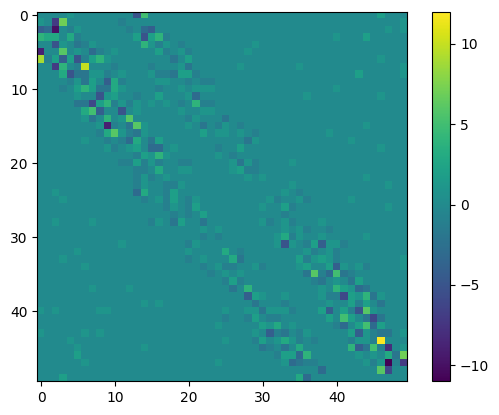

In [65]:
import matplotlib.pyplot as plt
plt.imshow(a - (b+c+d))
plt.colorbar()

In [60]:
print(e)
print(f)

[-1.31236492 -1.25768305 -1.20300118 -1.1483193  -1.09363743 -1.03895556
 -0.98427369 -0.92959182 -0.87490995 -0.82022807 -0.7655462  -0.71086433
 -0.65618246 -0.60150059 -0.54681872 -0.49213684 -0.43745497 -0.3827731
 -0.32809123 -0.27340936 -0.21872749 -0.16404561 -0.10936374 -0.05468187
  0.          0.05468187  0.10936374  0.16404561  0.21872749  0.27340936
  0.32809123  0.3827731   0.43745497  0.49213684  0.54681872  0.60150059
  0.65618246  0.71086433  0.7655462   0.82022807  0.87490995  0.92959182
  0.98427369  1.03895556  1.09363743  1.1483193   1.20300118  1.25768305
  1.31236492]
[-1.31236492 -1.25768305 -1.20300118 -1.1483193  -1.09363743 -1.03895556
 -0.98427369 -0.92959182 -0.87490995 -0.82022807 -0.7655462  -0.71086433
 -0.65618246 -0.60150059 -0.54681872 -0.49213684 -0.43745497 -0.3827731
 -0.32809123 -0.27340936 -0.21872749 -0.16404561 -0.10936374 -0.05468187
  0.          0.05468187  0.10936374  0.16404561  0.21872749  0.27340936
  0.32809123  0.3827731   0.43745497  0

In [29]:
# task_id = 1
# a = grid.plot_value_grid(PFC, values_by_task[yttask_id-1], task_id=task_id, phase=2, n_fig=1, sigma=4)
a = grid.plot_value_grid(PFC, values, phase=1, n_fig=45, sigma=8)

n:  33
(391,) (391,) (391, 15, 63)
[(8, 15, 63), (6, 15, 63), (0, 15, 63), (6, 15, 63), (6, 15, 63), (6, 15, 63), (10, 15, 63), (9, 15, 63), (6, 15, 63), (2, 15, 63), (9, 15, 63), (3, 15, 63), (2, 15, 63), (3, 15, 63), (2, 15, 63), (6, 15, 63), (3, 15, 63), (1, 15, 63), (11, 15, 63), (4, 15, 63), (1, 15, 63), (4, 15, 63), (2, 15, 63), (6, 15, 63), (11, 15, 63), (7, 15, 63), (2, 15, 63), (2, 15, 63), (2, 15, 63), (4, 15, 63), (5, 15, 63), (3, 15, 63), (4, 15, 63), (8, 15, 63), (3, 15, 63), (7, 15, 63), (2, 15, 63), (2, 15, 63), (3, 15, 63), (4, 15, 63), (2, 15, 63), (1, 15, 63), (1, 15, 63), (3, 15, 63), (3, 15, 63), (2, 15, 63), (4, 15, 63), (2, 15, 63), (5, 15, 63), (3, 15, 63), (6, 15, 63), (3, 15, 63), (3, 15, 63), (3, 15, 63), (1, 15, 63), (2, 15, 63), (4, 15, 63), (7, 15, 63), (1, 15, 63), (3, 15, 63), (2, 15, 63), (4, 15, 63), (4, 15, 63), (1, 15, 63), (4, 15, 63), (1, 15, 63), (5, 15, 63), (0, 15, 63), (7, 15, 63), (3, 15, 63), (2, 15, 63), (4, 15, 63), (4, 15, 63), (5, 15, 63),

/Users/jo/notebooks_paper/functions/functions_cells_grid.py:195: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jo/notebooks_paper/functions/functions_cells_grid.py:195: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jo/notebooks_paper/functions/functions_cells_grid.py:195: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanme

n:  11
(127,) (127,) (127, 15, 63)
[(5, 15, 63), (0, 15, 63), (0, 15, 63), (1, 15, 63), (1, 15, 63), (0, 15, 63), (2, 15, 63), (1, 15, 63), (1, 15, 63), (0, 15, 63), (1, 15, 63), (1, 15, 63), (2, 15, 63), (1, 15, 63), (1, 15, 63), (0, 15, 63), (1, 15, 63), (1, 15, 63), (2, 15, 63), (2, 15, 63), (1, 15, 63), (2, 15, 63), (1, 15, 63), (2, 15, 63), (1, 15, 63), (3, 15, 63), (0, 15, 63), (1, 15, 63), (0, 15, 63), (2, 15, 63), (4, 15, 63), (0, 15, 63), (2, 15, 63), (3, 15, 63), (2, 15, 63), (3, 15, 63), (1, 15, 63), (0, 15, 63), (2, 15, 63), (2, 15, 63), (0, 15, 63), (1, 15, 63), (0, 15, 63), (0, 15, 63), (1, 15, 63), (1, 15, 63), (2, 15, 63), (1, 15, 63), (1, 15, 63), (1, 15, 63), (2, 15, 63), (1, 15, 63), (1, 15, 63), (1, 15, 63), (0, 15, 63), (1, 15, 63), (2, 15, 63), (5, 15, 63), (0, 15, 63), (2, 15, 63), (1, 15, 63), (1, 15, 63), (2, 15, 63), (0, 15, 63), (0, 15, 63), (0, 15, 63), (2, 15, 63), (0, 15, 63), (1, 15, 63), (1, 15, 63), (1, 15, 63), (2, 15, 63), (3, 15, 63), (3, 15, 63), (2

/Users/jo/notebooks_paper/functions/functions_cells_grid.py:195: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jo/notebooks_paper/functions/functions_cells_grid.py:195: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jo/notebooks_paper/functions/functions_cells_grid.py:195: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanme

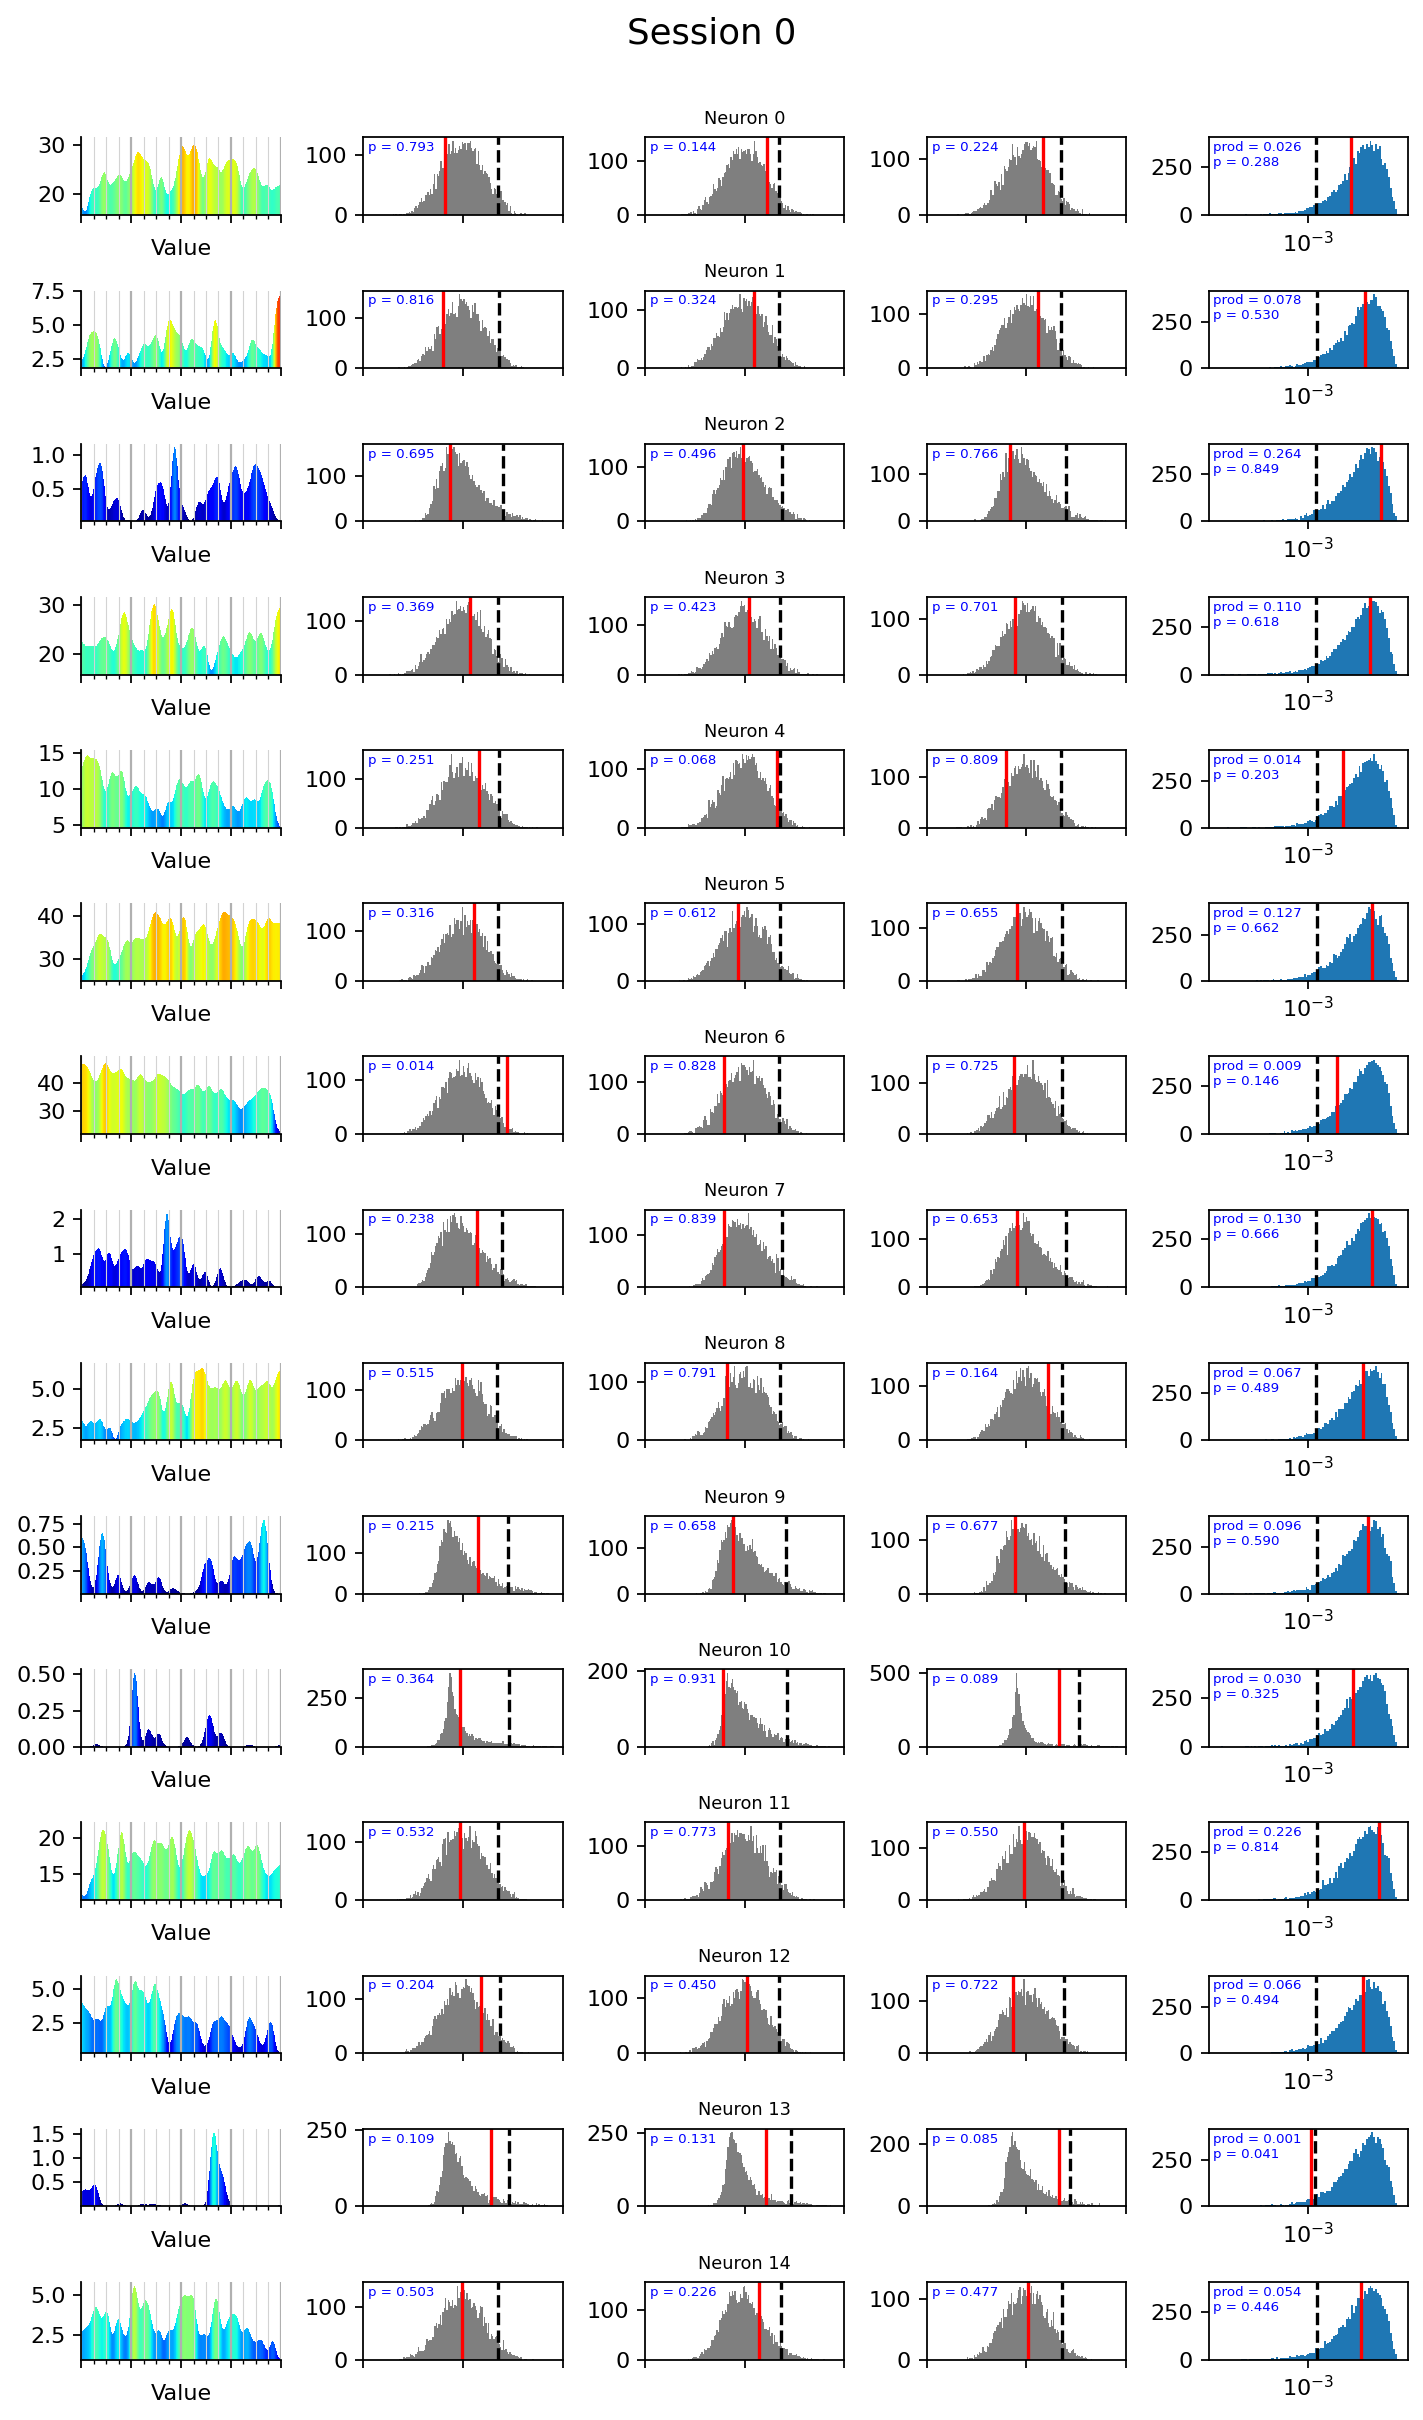

In [26]:
p_vals, p_vals_prod = grid.permute_value_grid(PFC, values_by_task, phase=1, n_fig=1)

In [280]:
[_.shape for _ in p_vals]

[(3, 15),
 (3, 12),
 (3, 11),
 (3, 12),
 (3, 9),
 (3, 13),
 (3, 6),
 (3, 18),
 (3, 21),
 (3, 4),
 (3, 12),
 (3, 8),
 (3, 9),
 (3, 7),
 (3, 12),
 (3, 7),
 (3, 9),
 (3, 7),
 (3, 14),
 (3, 5),
 (3, 8),
 (3, 9),
 (3, 14),
 (3, 8),
 (3, 5),
 (3, 17),
 (3, 9),
 (3, 7),
 (3, 14),
 (3, 12),
 (3, 17),
 (3, 6),
 (3, 16),
 (3, 21),
 (3, 16),
 (3, 15),
 (3, 12),
 (3, 13),
 (3, 18),
 (3, 12),
 (3, 13),
 (3, 17),
 (3, 14),
 (3, 23),
 (3, 29)]

In [282]:
import pickle
phase = 1
sigma = 8
import os
save_dir = os.path.join('./analysis/neurons/grids/', f'phase_{str(phase)}', 'p_tests', f'phase_{phase}', f'sigma_{sigma}')
np.save(os.path.join(save_dir, 'p_vals_prod.npy'), np.array(p_vals_prod, dtype=object), allow_pickle=True)


with open(os.path.join(save_dir, 'p_vals_prod.pkl'), 'wb') as f:
    pickle.dump(p_vals_prod, f)
with open(os.path.join(save_dir, 'p_vals.pkl'), 'wb') as f:
    pickle.dump(p_vals, f)

# sigma = 6
# p_vals, p_vals_prod = grid.permute_value_grid(PFC, values_by_task, phase=phase, sigma=sigma, n_fig=45)
# import os
# save_dir = os.path.join('./analysis/neurons/grids/', f'phase_{str(phase)}', 'p_tests', f'phase_{phase}', f'sigma_{sigma}')
# np.save('p_vals_prod.npy', np.array(p_vals_prod, dtype=object), allow_pickle=True)
# np.save('p_vals.npy', np.array(p_vals, dtype=object), allow_pickle=True)

# sigma = 8
# phase = 0
# p_vals, p_vals_prod = grid.permute_value_grid(PFC, values_by_task, phase=phase, sigma=sigma, n_fig=45)
# import os
# save_dir = os.path.join('./analysis/neurons/grids/', f'phase_{str(phase)}', 'p_tests', f'phase_{phase}', f'sigma_{sigma}')
# np.save('p_vals_prod.npy', np.array(p_vals_prod, dtype=object), allow_pickle=True)
# np.save('p_vals.npy', np.array(p_vals, dtype=object), allow_pickle=True)

In [286]:
neuron_ids = [np.where(p < 0.01)[0] for p in p_vals_prod]
neuron_ids = [[i, ids] for i, ids in enumerate(neuron_ids) if len(ids)]

In [287]:
neuron_ids

[[4, array([7, 8])],
 [5, array([6])],
 [6, array([4])],
 [8, array([11])],
 [10, array([1])],
 [16, array([3])],
 [18, array([3])],
 [33, array([20])],
 [34, array([2])],
 [37, array([4, 6])],
 [38, array([3])],
 [41, array([1])],
 [44, array([17])]]

In [273]:
[np.where(p < 0.01) for p in p_vals_prod]

[(array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([], dtype=int64),),
 (array([4]),),
 (array([7, 8]),)]

In [239]:
# q: how to get product of rows of array
np.prod(p_vals[0], axis=0)

array([0.00884768, 0.08200301, 0.31507519, 0.5802345 , 0.23662028,
       0.12750372, 0.45830633, 0.0226368 , 0.01823522, 0.01570102,
       0.17031737, 0.02005819, 0.10349596, 0.01293483, 0.05540595])

In [209]:
x = 5*np.random.rand(4)
y = 5*np.random.rand(4)

x_ = x - np.mean(x)
y_ = y - np.mean(y)

print(np.dot(x_, y_) / (np.linalg.norm(x_) * np.linalg.norm(y_)))
print(np.corrcoef(x, y)[0,1])

0.32190043003400737
0.32190043003400737


In [17]:
use_sig = False
fold = False
n_p_bins = 100
n = 11

tuning_means, tuning_stds, samples = [], [], []
firing_by_bins_sessions = []
firing_rates = PFC['Data'][0]
for session, (value, firing_rate) in enumerate(zip(values, firing_rates)):
    firing_rate = firing_rate[n:]
    n_neurons = firing_rate.shape[1]; n_timepoints = firing_rate.shape[-1]

    if use_sig: 
        belief = logistic.cdf(value)
        if fold: belief = 0.5 + np.abs(belief - 0.5)
        lims = [0, 1] if not fold else [0.5, 1]
        bin_edges = np.linspace(lims[0], lims[1], n_p_bins+1)[1:-1]  # Creates 5 edges for 4 bins
        bins = np.digitize(belief, bin_edges)
    else:
        if fold: value = np.abs(value)
        lims = [-np.max(np.abs(value)), np.max(np.abs(value))] if not fold else [0, np.max(np.abs(value))]
        bin_edges = np.linspace(lims[0], lims[1], n_p_bins+1)[1:-1]  # Creates 5 edges for 4 bins
        bins = np.digitize(value, bin_edges)

    # Number of unique states
    bins = bins.flatten()
    num_states = n_p_bins

    print(len(bins), firing_rate.shape)

    sample = np.zeros(n_p_bins)
    tuning_mean = np.zeros((n_neurons, n_timepoints, n_p_bins)); tuning_std = np.zeros((n_neurons, n_timepoints, n_p_bins))
    firing_by_bins = []
    for p in range(n_p_bins):
        p_mask = bins == p
        p_firing_rate = firing_rate[p_mask]
        tuning_mean[:, :, p] = np.nanmean(p_firing_rate, axis=0)
        tuning_std[:, :, p] = np.nanstd(p_firing_rate, axis=0)
        firing_by_bins.append(p_firing_rate)
        sample[p] = np.count_nonzero(p_mask)

    tuning_means.append(tuning_mean); tuning_stds.append(tuning_std); samples.append(sample); firing_by_bins_sessions.append(firing_by_bins)


413 (413, 15, 63)
414 (414, 12, 63)
549 (549, 11, 63)
471 (471, 12, 63)
550 (550, 9, 63)
419 (419, 13, 63)
419 (419, 6, 63)
379 (379, 18, 63)
352 (352, 21, 63)
567 (567, 4, 63)
481 (481, 12, 63)
383 (383, 8, 63)
515 (515, 9, 63)
549 (549, 7, 63)
377 (377, 12, 63)
359 (359, 7, 63)
523 (523, 9, 63)
459 (459, 7, 63)
579 (579, 14, 63)
415 (415, 5, 63)
434 (434, 8, 63)


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_52795/3932212229.py:37: RuntimeWarning: Mean of empty slice
  tuning_mean[:, :, p] = np.nanmean(p_firing_rate, axis=0)
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


348 (348, 9, 63)
394 (394, 14, 63)
466 (466, 8, 63)
570 (570, 5, 63)
444 (444, 17, 63)
441 (441, 9, 63)
375 (375, 7, 63)
467 (467, 14, 63)
458 (458, 12, 63)
641 (641, 17, 63)
416 (416, 6, 63)
607 (607, 16, 63)
452 (452, 21, 63)
467 (467, 16, 63)
472 (472, 15, 63)
464 (464, 12, 63)
442 (442, 13, 63)
561 (561, 18, 63)
542 (542, 12, 63)
452 (452, 13, 63)
784 (784, 17, 63)
536 (536, 14, 63)
346 (346, 23, 63)
344 (344, 29, 63)


(array([ 17.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   7.,
          0.,   0.,   0.,   0.,   0.,   0.,  24.,  29.,  34.,  57.,  42.,
         13.,  30.,  29.,  39.,  72.,  64.,  49.,   8.,  73.,  84., 104.,
         77.,  68., 111., 139., 147., 129., 226., 149., 154., 153., 215.,
        253., 250., 248., 242., 219., 267., 234., 335., 315., 270., 283.,
        342., 297., 215., 176., 178., 271., 255., 287., 218., 234., 228.,
        230., 114., 154., 137., 130., 139., 109., 137., 130.,  92.,  62.,
         86.,  54.,  53.,  28.,  75.,  48.,  43.,  38.,  20.,  36.,  12.,
         18.,   6.,  18.,   7.,  10.,  15.,   7.,  16.,   8.,   0.,   0.,
          7.]),
 array([-3.62605298, -3.55809626, -3.49013954, -3.42218282, -3.35422611,
        -3.28626939, -3.21831267, -3.15035595, -3.08239924, -3.01444252,
        -2.9464858 , -2.87852909, -2.81057237, -2.74261565, -2.67465893,
        -2.60670222, -2.5387455 , -2.47078878, -2.40283206, -2.33487535,
        -2.26691863, -2.19

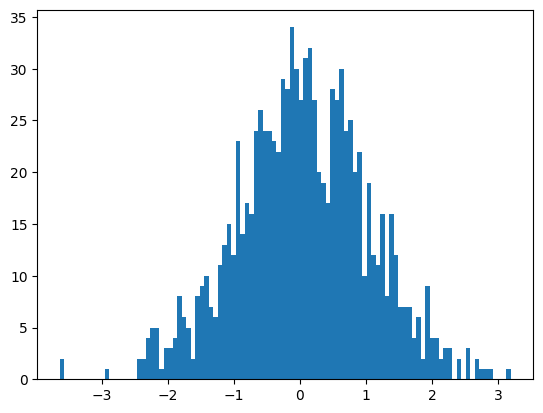

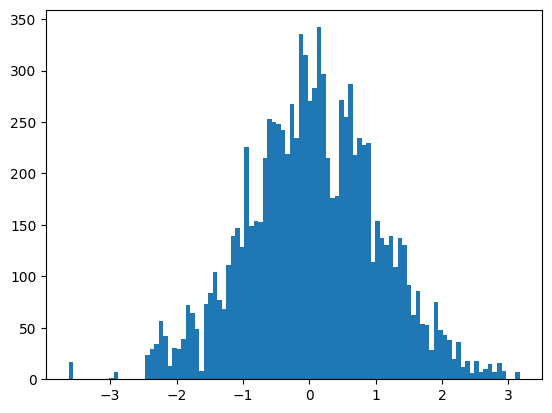

In [244]:
x = np.random.normal(0, 1, 1000)
plt.hist(x, bins=100)
y = grid.sample_from_histogram(x, num_samples=10000)
plt.figure()
plt.hist(y, bins=100)

In [18]:
def get_tuning(firing, t):
    firing_by_bins_timewindow = [z[:, :, t] for z in firing]
    tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
    std = np.array([np.nanstd(x, axis=(0,2)) for x in firing_by_bins_timewindow])

    tuning = tuning.transpose(1,0)
    std = std.transpose(1,0)
    
    samples = np.array([x.shape[0] * x.shape[2] for x in firing_by_bins_timewindow])

    scatter = [f.transpose(1,0,2).reshape(f.shape[1], -1) for f in firing_by_bins_timewindow]

    return tuning, std, samples, scatter

def get_tuning_half(firing, t, by_trial=True):
    firing_by_bins_timewindow = [z[:, :, t] for z in firing]
    tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
    # std = np.array([np.nanstd(x, axis=(0,2)) for x in firing_by_bins_timewindow])

    tuning = tuning.transpose(1,0)
    # std = std.transpose(1,0)
    
    # samples = np.array([x.shape[0] * x.shape[2] for x in firing_by_bins_timewindow])

    # scatter = [f.transpose(1,0,2).reshape(f.shape[1], -1) for f in firing_by_bins_timewindow]
    tunings_1, tunings_2 = [], []
    for firing_bin_timewindow in firing_by_bins_timewindow:
        if by_trial:
            idxs = np.random.choice(firing_bin_timewindow.shape[0], firing_bin_timewindow.shape[0]//2, replace=False)
            # np.random.choice(range(x.shape[0]), 41928, replace=False)
            half_1 = firing_bin_timewindow[idxs]
            half_2 = np.delete(firing_bin_timewindow, idxs, axis=0)
            tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
            tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time
            tunings_1.append(tuning_1); tunings_2.append(tuning_2)
        else:
            raise ValueError()

    tunings_1 = np.array(tunings_1); tunings_2 = np.array(tunings_2)
    tunings_1 = tunings_1.transpose(1,0); tunings_2 = tunings_2.transpose(1,0)

    return tunings_1, tunings_2

In [400]:
import os

In [45]:
phase = 2
dlc = False

if dlc == False:
    time_ind = [0, 24, 35, 42, 63]
else:
    time_ind = [0, 25, 38, 45, 64]

t = np.arange(time_ind[phase]+1, time_ind[phase+1])
print(t)

[36 37 38 39 40 41]


In [24]:
import os
import matplotlib.pyplot as plt

/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_52795/2753855877.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_52795/1546578227.py:3: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


array([[17.03074797, 16.97058755, 16.85354217, ..., 22.96307223,
        22.96462784, 22.9653534 ],
       [ 2.32437177,  2.32745811,  2.33375873, ...,  3.32786486,
         3.32767425,  3.32750874],
       [ 0.64029304,  0.64887367,  0.66556702, ...,  0.03559792,
         0.03543544,  0.03538283],
       ...,
       [ 3.98979448,  3.97267366,  3.93920706, ...,  1.37841073,
         1.37502447,  1.37341066],
       [ 0.32144651,  0.32501138,  0.33196463, ...,  0.02641873,
         0.0272539 ,  0.02768134],
       [ 2.76941676,  2.77846492,  2.7962072 , ...,  5.36462814,
         5.37283505,  5.37678454]])

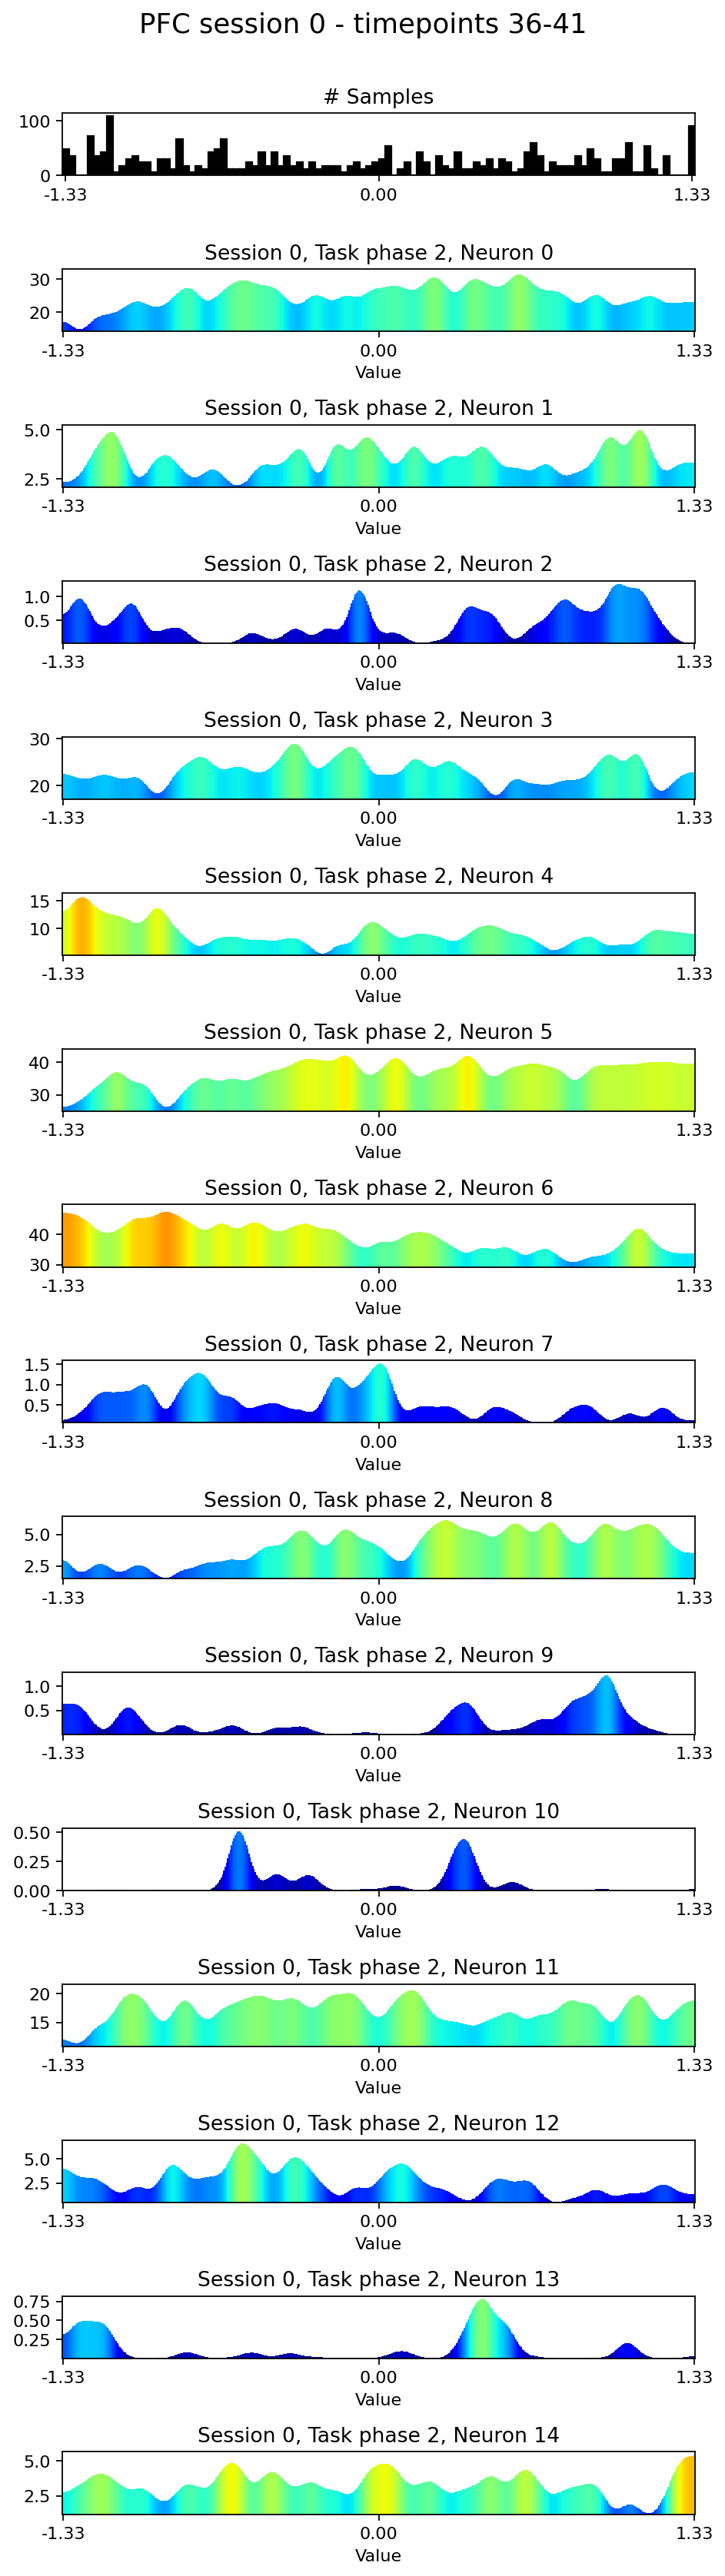

In [46]:
use_color = True
use_smoothed = True
sigma = 8

n_p_bins = 100

save_dir = os.path.join('./analysis/neurons/grids/', f'phase_{str(phase)}', 'smoothed' if use_smoothed else 'raw', 'color' if use_color else 'bw', f'sigma_{sigma}', f'{n_p_bins}bins')
os.makedirs(save_dir, exist_ok=True)

n_fig = 1

def plot_value_grid(firing_by_bins_sessions, bin_edges, t, n_fig=1, plot_scatter=True):
    # cmap = plt.cm.get_cmap('viridis')
    cmap = plt.cm.get_cmap('jet')

    for session, firing_by_bins in enumerate(firing_by_bins_sessions[:n_fig]):
        tuning_mean_, tuning_std_, sample, scatter = get_tuning(firing_by_bins, t)
        n_neurons = tuning_mean_.shape[0]
        fig, axes = plt.subplots(1+n_neurons, 1, figsize=(6, 1.3*(1+n_neurons)), dpi=160)

        if len(t) > 1:
            fig.suptitle(f'PFC session {session} - timepoints {t[0]}-{t[-1]}', fontsize=16, y=1.005)
        else:
            fig.suptitle(f'PFC session {session} - timepoint {t}', fontsize=16)

        axes[0].bar(np.arange(n_p_bins), sample, color='k', width=1, edgecolor='black')
        axes[0].title.set_text(f'# Samples')
        axes[0].set_xticks([0, (n_p_bins-1)/2, n_p_bins-1], [f'{b:.2f}' for b in [bin_edges[0], np.median(bin_edges), bin_edges[-1]]])
        axes[0].set_xlim([-0.5, n_p_bins-0.5])

        tuning_smoothed = smooth_upsample_tunings(tuning_mean_, factor=5, sigma=sigma)
        y = tuning_mean_ if not use_smoothed else tuning_smoothed
        n_bins = y.shape[1]
        
        for j in range(n_neurons):
            vmin = np.nanmin(tuning_mean_[j,:]); vmax = np.nanmax(tuning_mean_[j,:])
            # vmin = np.nanmin(y[j,:]); vmax = np.nanmax(y[j,:])

            for i in range(n_bins):
                # col = cmap(i / n_p_bins)
                col = cmap((y[j,i]-vmin)/(vmax-vmin))
                # axes[port, step].scatter(x_comp[i, dims[0]], i, c=col, s=7, marker='o', label=i)
                # axes[j+1].bar(i, np.mean(tuning_mean[j, t, i]), color=col, width=1, edgecolor='black')
                axes[j+1].bar(i, y[j,i], color=col, width=1, edgecolor='black' if not use_color else 'none')

                if plot_scatter:
                    w=0.25
                    n_scatter = sample[i]
                    print(len(scatter[i][j]), sample[i])
                    if n_scatter > 0:
                        axes[j+1].scatter(i * np.ones(n_scatter) + - w/2 + w*np.random.random(n_scatter), scatter[i][j], c='k', s=0.25, edgecolors='none')
            # axes[i].bar(np.arange(timepoints), tuning_mean[i, t, :], width=1)
            # q: add error bars using tuning_std
            # axes[j+1].errorbar(np.arange(timepoints), tuning_mean[j, t, :], yerr=tuning_std[j, t, :], linestyle='', color='k', capsize=2, elinewidth=1, capthick=1)
            # axes[j+1].errorbar(np.arange(timepoints), tuning_mean_[j, :], yerr=tuning_std_[j, :], linestyle='', color='k', capsize=2, elinewidth=1, capthick=1)
            axes[j+1].set_ylim(bottom=0.95*np.nanmin(y[j,:]), top=1.05*np.nanmax(y[j,:]))
            axes[j+1].title.set_text(f'Session {session}, Task phase {phase}, Neuron {j}')
            # if j == n_neurons-1:
            axes[j+1].set_xticks([0, (n_bins-1)/2, n_bins-1], [f'{b:.2f}' for b in [bin_edges[0], np.median(bin_edges), bin_edges[-1]]])
            axes[j+1].set_xlabel('Value')
            # else:
                # axes[j].xaxis.set_visible(False)
                # axes[j+1].set_xticks([0, (n_p_bins-1)/2, n_p_bins-1], [])
            axes[j+1].set_xlim([-0.5, n_bins-0.5])

        plt.tight_layout()
        # fig.savefig(os.path.join(save_dir, f'session{session}.png'), dpi=300)
        # if n_fig > 1: plt.close()

    return tuning_smoothed

plot_value_grid(firing_by_bins_sessions, bin_edges, t=t, n_fig=n_fig, plot_scatter=False)

In [27]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.interpolate import interp1d

t = np.arange(0,20)
# Original data
data = firing_by_bins_sessions[0]
tuning_mean_, tuning_std_, sample, scatter = get_tuning(data, t)

data = tuning_mean_[0]

def smooth_upsample(data, factor, sigma):
    n_p_bins = len(data)
    x_old = np.linspace(0, n_p_bins-1, n_p_bins)  # Original indices
    x_new = np.linspace(0, n_p_bins-1, n_p_bins*factor)  # New indices for higher resolution
    valid = ~np.isnan(data)
    interpolator = interp1d(x_old[valid], data[valid], kind='zero', fill_value="extrapolate")
    upsampled_data = interpolator(x_new)
    smoothed_upsampled_data = gaussian_filter(upsampled_data, sigma=sigma)
    return smoothed_upsampled_data

def smooth_upsample_tunings(data, factor=5, sigma=5):
    return np.array([smooth_upsample(d, factor, sigma) for d in data])

# # Upsampling the data without initial smoothing
# x_old = np.linspace(0, n_p_bins-1, n_p_bins)  # Original indices
# x_new = np.linspace(0, n_p_bins-1, 500)  # New indices for higher resolution
# valid = ~np.isnan(data)
# interpolator = interp1d(x_old[valid], data[valid], kind='zero', fill_value="extrapolate")
# upsampled_data = interpolator(x_new)

# # Smoothing the upsampled data
# sigma = 5  # Adjusted for higher density of points
# smoothed_upsampled_data = gaussian_filter(upsampled_data, sigma=sigma)

# # Plot the results (Optional)
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 5))
# plt.plot(x_old, data, 'o-', label='Original Data')
# plt.plot(x_new, upsampled_data, label='Upsampled Data')
# plt.plot(x_new, smoothed_upsampled_data, label='Smoothed Upsampled Data', linestyle='--')
# plt.legend()
# plt.show()


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_52795/1546578227.py:3: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/2699092831.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


3 0 5
3 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


3 0 5
3 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


3 0 5
3 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


3 0 5
3 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


3 0 5
3 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


3 0 5
3 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


3 0 5
3 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


3 0 5
3 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


3 0 5
3 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


3 0 5
3 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


8 0 18
8 0 18


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


8 0 18
8 0 18


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


8 0 18
8 0 18


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


8 0 18
8 0 18


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


8 0 18
8 0 18


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


8 0 18
8 0 18


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


8 0 18
8 0 18


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


8 0 18
8 0 18


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


8 0 18
8 0 18


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


8 0 18
8 0 18


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


11 0 1
11 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


11 0 1
11 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


11 0 1
11 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


11 0 1
11 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


11 0 1
11 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


11 0 1
11 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


11 0 1
11 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


11 0 1
11 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


11 0 1
11 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


11 0 1
11 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


13 0 3
13 0 3


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


13 0 3
13 0 3


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


13 0 3
13 0 3


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


13 0 3
13 0 3


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


13 0 3
13 0 3


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


13 0 3
13 0 3


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


13 0 3
13 0 3


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


13 0 3
13 0 3


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


13 0 3
13 0 3


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


13 0 3
13 0 3


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


14 0 0
14 0 0


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


14 0 0
14 0 0


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


14 0 0
14 0 0


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


14 0 0
14 0 0


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


14 0 0
14 0 0


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


14 0 0
14 0 0


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


14 0 0
14 0 0


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


14 0 0
14 0 0


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


14 0 0
14 0 0


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


14 0 0
14 0 0


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


15 0 5
15 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


15 0 5
15 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


15 0 5
15 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


15 0 5
15 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


15 0 5
15 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


15 0 5
15 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


15 0 5
15 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


15 0 5
15 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


15 0 5
15 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


15 0 5
15 0 5


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


25 0 12
25 0 12


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


25 0 12
25 0 12


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


25 0 12
25 0 12


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


25 0 12
25 0 12


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


25 0 12
25 0 12


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


25 0 12
25 0 12


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


25 0 12
25 0 12


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


25 0 12
25 0 12


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


25 0 12
25 0 12


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


25 0 12
25 0 12


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


33 0 17
33 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


33 0 17
33 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


33 0 17
33 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


33 0 17
33 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


33 0 17
33 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


33 0 17
33 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


33 0 17
33 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


33 0 17
33 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


33 0 17
33 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


33 0 17
33 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


34 0 2
34 1 7
34 2 13
34 0 2
34 1 7
34 2 13


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


34 0 2
34 1 7
34 2 13
34 0 2
34 1 7
34 2 13


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


34 0 2
34 1 7
34 2 13
34 0 2
34 1 7
34 2 13


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


34 0 2
34 1 7
34 2 13
34 0 2
34 1 7
34 2 13


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


34 0 2
34 1 7
34 2 13
34 0 2
34 1 7
34 2 13


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


34 0 2
34 1 7
34 2 13
34 0 2
34 1 7
34 2 13


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


34 0 2
34 1 7
34 2 13
34 0 2
34 1 7
34 2 13


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


34 0 2
34 1 7
34 2 13
34 0 2
34 1 7
34 2 13


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


34 0 2
34 1 7
34 2 13
34 0 2
34 1 7
34 2 13


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


34 0 2
34 1 7
34 2 13
34 0 2
34 1 7
34 2 13


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


37 0 11
37 1 3
37 2 6
37 3 4
37 0 11
37 1 3
37 2 6
37 3 4


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


37 0 11
37 1 3
37 2 6
37 3 4
37 0 11
37 1 3
37 2 6
37 3 4


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


37 0 11
37 1 3
37 2 6
37 3 4
37 0 11
37 1 3
37 2 6
37 3 4


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


37 0 11
37 1 3
37 2 6
37 3 4
37 0 11
37 1 3
37 2 6
37 3 4


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


37 0 11
37 1 3
37 2 6
37 3 4
37 0 11
37 1 3
37 2 6
37 3 4


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


37 0 11
37 1 3
37 2 6
37 3 4
37 0 11
37 1 3
37 2 6
37 3 4


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


37 0 11
37 1 3
37 2 6
37 3 4
37 0 11
37 1 3
37 2 6
37 3 4


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


37 0 11
37 1 3
37 2 6
37 3 4
37 0 11
37 1 3
37 2 6
37 3 4


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


37 0 11
37 1 3
37 2 6
37 3 4
37 0 11
37 1 3
37 2 6
37 3 4


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


37 0 11
37 1 3
37 2 6
37 3 4
37 0 11
37 1 3
37 2 6
37 3 4


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


38 0 17
38 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


38 0 17
38 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


38 0 17
38 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


38 0 17
38 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


38 0 17
38 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


38 0 17
38 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


38 0 17
38 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


38 0 17
38 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


38 0 17
38 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


38 0 17
38 0 17


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


39 0 9
39 1 8
39 0 9
39 1 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


39 0 9
39 1 8
39 0 9
39 1 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


39 0 9
39 1 8
39 0 9
39 1 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


39 0 9
39 1 8
39 0 9
39 1 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


39 0 9
39 1 8
39 0 9
39 1 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


39 0 9
39 1 8
39 0 9
39 1 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


39 0 9
39 1 8
39 0 9
39 1 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


39 0 9
39 1 8
39 0 9
39 1 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


39 0 9
39 1 8
39 0 9
39 1 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


39 0 9
39 1 8
39 0 9
39 1 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


40 0 1
40 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


40 0 1
40 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


40 0 1
40 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


40 0 1
40 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


40 0 1
40 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


40 0 1
40 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


40 0 1
40 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


40 0 1
40 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


40 0 1
40 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


40 0 1
40 0 1


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


41 0 8
41 0 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


41 0 8
41 0 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


41 0 8
41 0 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


41 0 8
41 0 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


41 0 8
41 0 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


41 0 8
41 0 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


41 0 8
41 0 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


41 0 8
41 0 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


41 0 8
41 0 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


41 0 8
41 0 8


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


42 0 9
42 1 7
42 0 9
42 1 7


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


42 0 9
42 1 7
42 0 9
42 1 7


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


42 0 9
42 1 7
42 0 9
42 1 7


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


42 0 9
42 1 7
42 0 9
42 1 7


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


42 0 9
42 1 7
42 0 9
42 1 7


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


42 0 9
42 1 7
42 0 9
42 1 7


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


42 0 9
42 1 7
42 0 9
42 1 7


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


42 0 9
42 1 7
42 0 9
42 1 7


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


42 0 9
42 1 7
42 0 9
42 1 7


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


42 0 9
42 1 7
42 0 9
42 1 7


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


43 0 7
43 1 0
43 2 19
43 3 6
43 0 7
43 1 0
43 2 19
43 3 6


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


43 0 7
43 1 0
43 2 19
43 3 6
43 0 7
43 1 0
43 2 19
43 3 6


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


43 0 7
43 1 0
43 2 19
43 3 6
43 0 7
43 1 0
43 2 19
43 3 6


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


43 0 7
43 1 0
43 2 19
43 3 6
43 0 7
43 1 0
43 2 19
43 3 6


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


43 0 7
43 1 0
43 2 19
43 3 6
43 0 7
43 1 0
43 2 19
43 3 6


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


43 0 7
43 1 0
43 2 19
43 3 6
43 0 7
43 1 0
43 2 19
43 3 6


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


43 0 7
43 1 0
43 2 19
43 3 6
43 0 7
43 1 0
43 2 19
43 3 6


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


43 0 7
43 1 0
43 2 19
43 3 6
43 0 7
43 1 0
43 2 19
43 3 6


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


43 0 7
43 1 0
43 2 19
43 3 6
43 0 7
43 1 0
43 2 19
43 3 6


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


43 0 7
43 1 0
43 2 19
43 3 6
43 0 7
43 1 0
43 2 19
43 3 6


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


44 0 1
44 1 23
44 2 15
44 0 1
44 1 23
44 2 15


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


44 0 1
44 1 23
44 2 15
44 0 1
44 1 23
44 2 15


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


44 0 1
44 1 23
44 2 15
44 0 1
44 1 23
44 2 15


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


44 0 1
44 1 23
44 2 15
44 0 1
44 1 23
44 2 15


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


44 0 1
44 1 23
44 2 15
44 0 1
44 1 23
44 2 15


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


44 0 1
44 1 23
44 2 15
44 0 1
44 1 23
44 2 15


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


44 0 1
44 1 23
44 2 15
44 0 1
44 1 23
44 2 15


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


44 0 1
44 1 23
44 2 15
44 0 1
44 1 23
44 2 15


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


44 0 1
44 1 23
44 2 15
44 0 1
44 1 23
44 2 15


/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:17: RuntimeWarning: Mean of empty slice
  tuning = np.array([np.nanmean(x, axis=(0,2)) for x in firing_by_bins_timewindow])  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:33: RuntimeWarning: Mean of empty slice
  tuning_1 = np.nanmean(half_1, axis=(0,2))  # average across sample and time
/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/1546578227.py:34: RuntimeWarning: Mean of empty slice
  tuning_2 = np.nanmean(half_2, axis=(0,2))  # average across sample and time


44 0 1
44 1 23
44 2 15
44 0 1
44 1 23
44 2 15


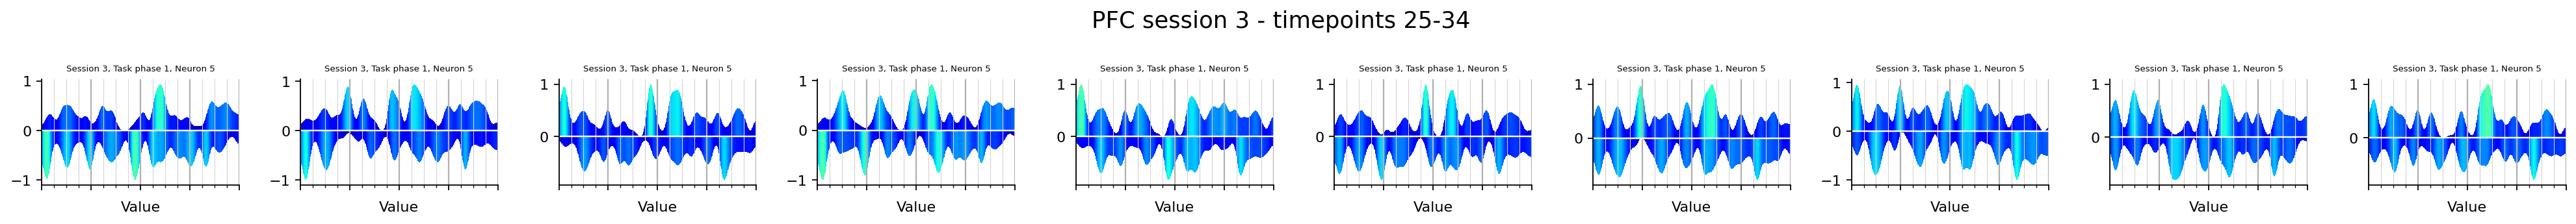

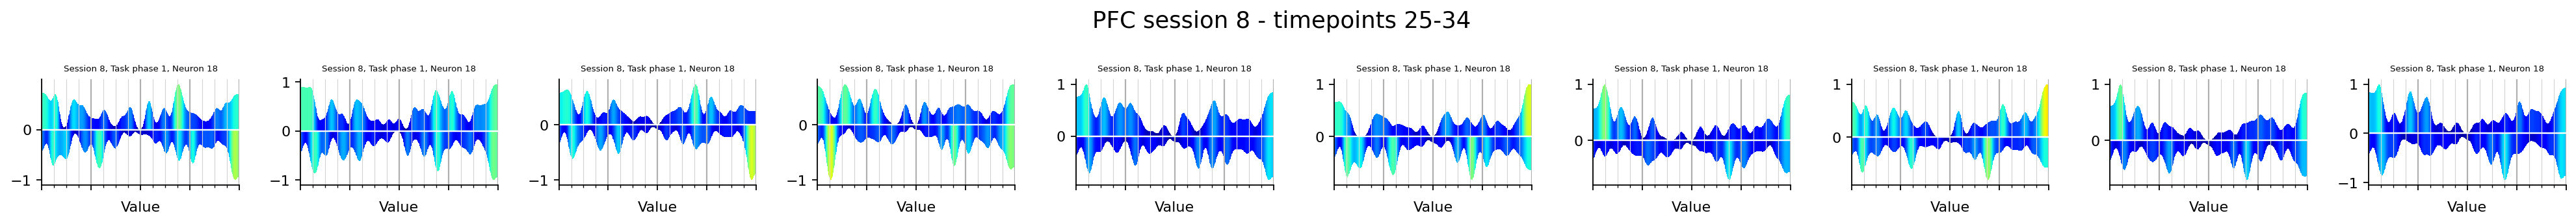

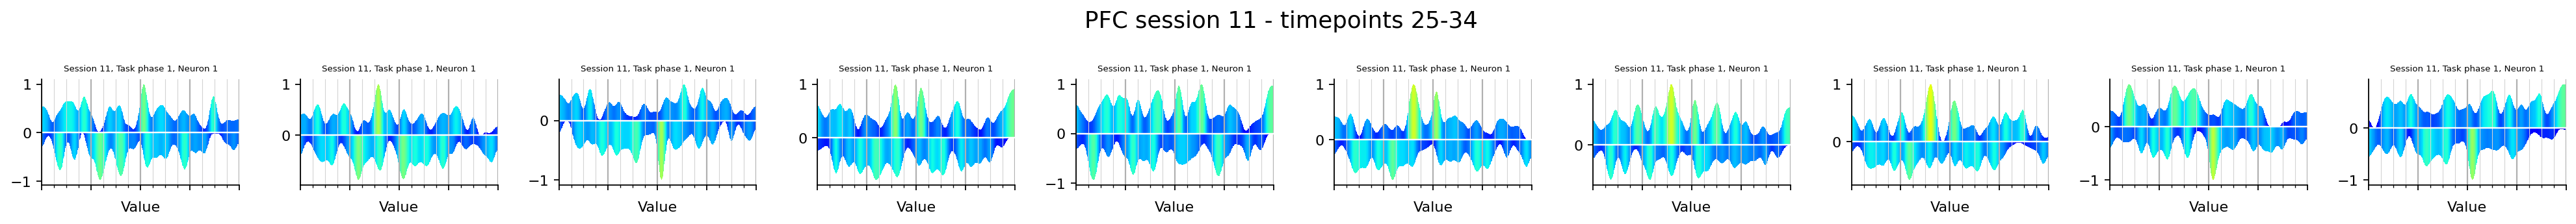

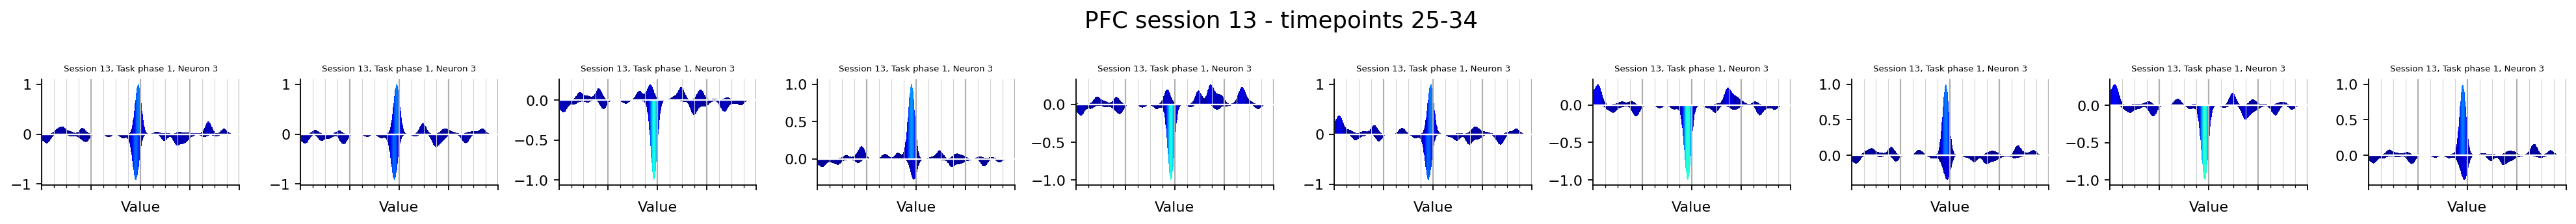

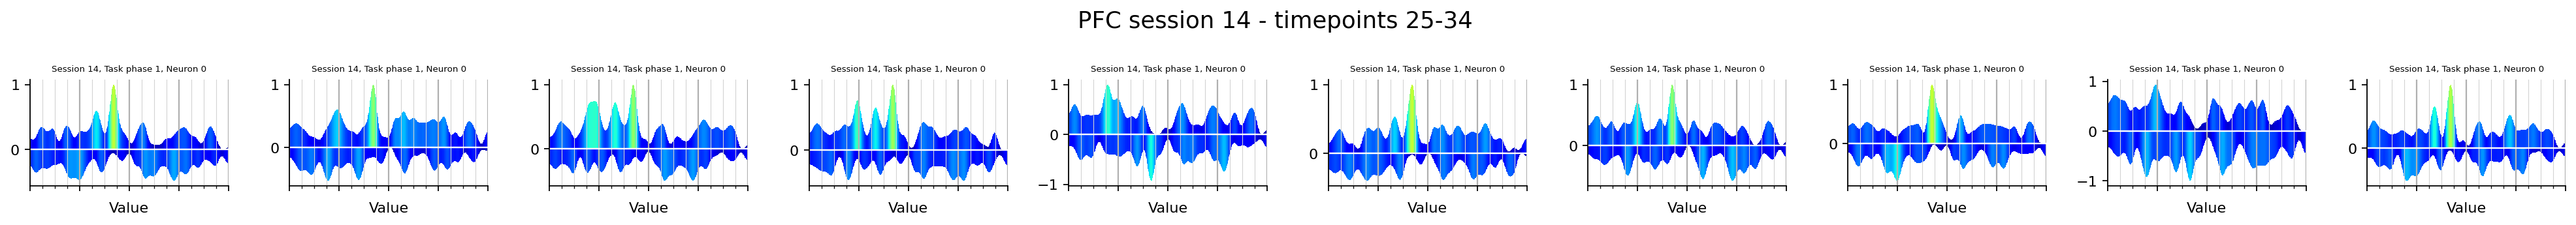

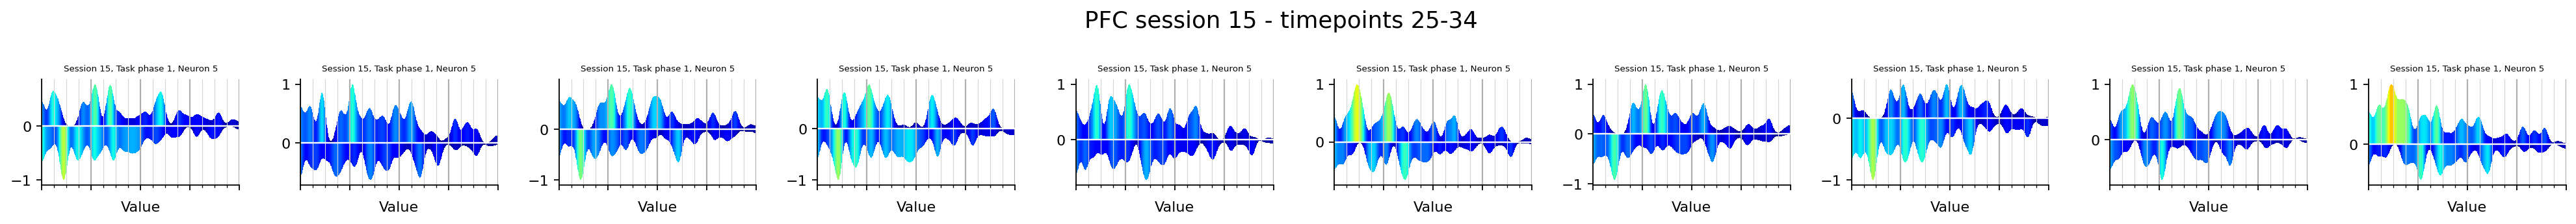

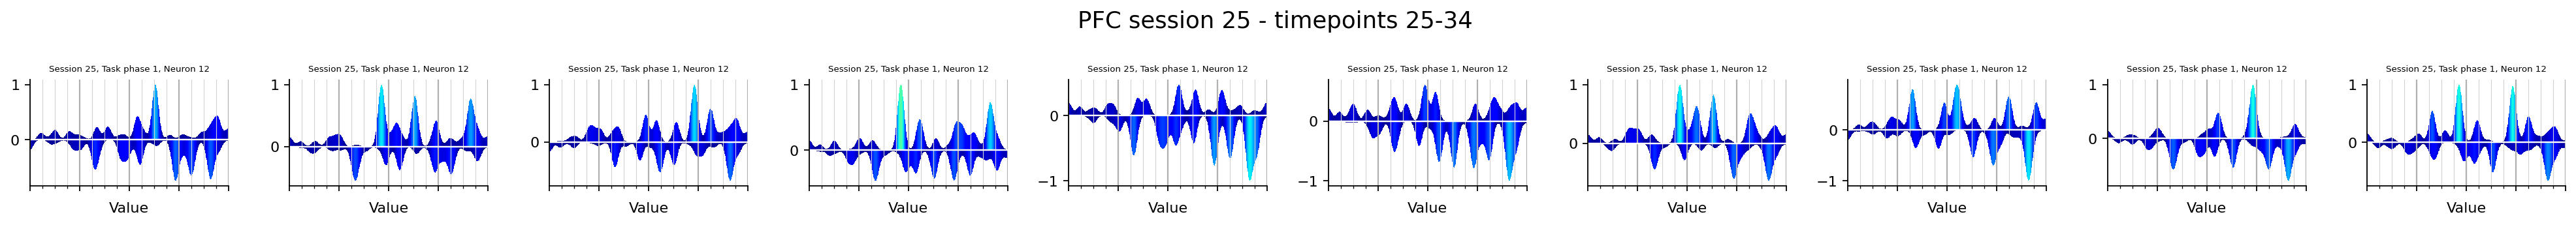

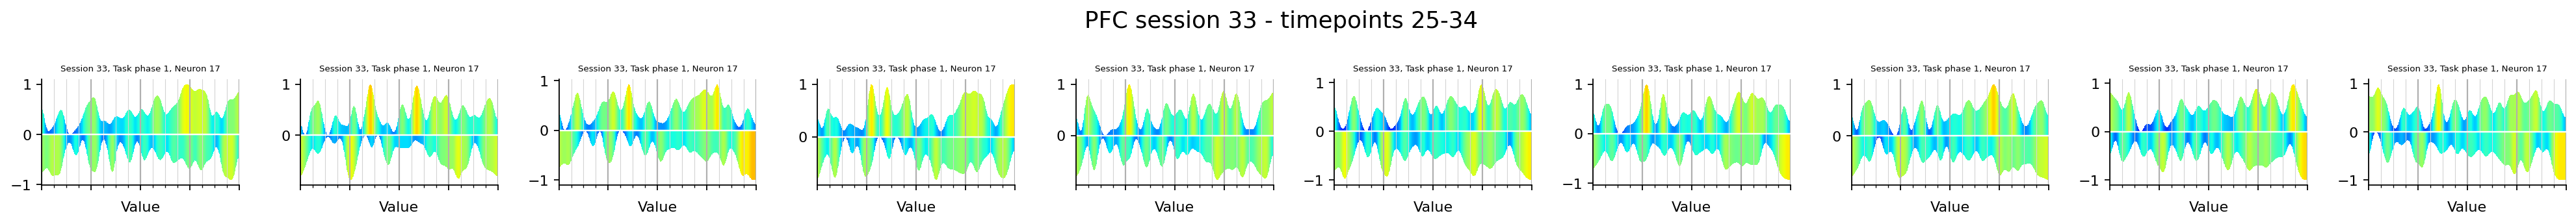

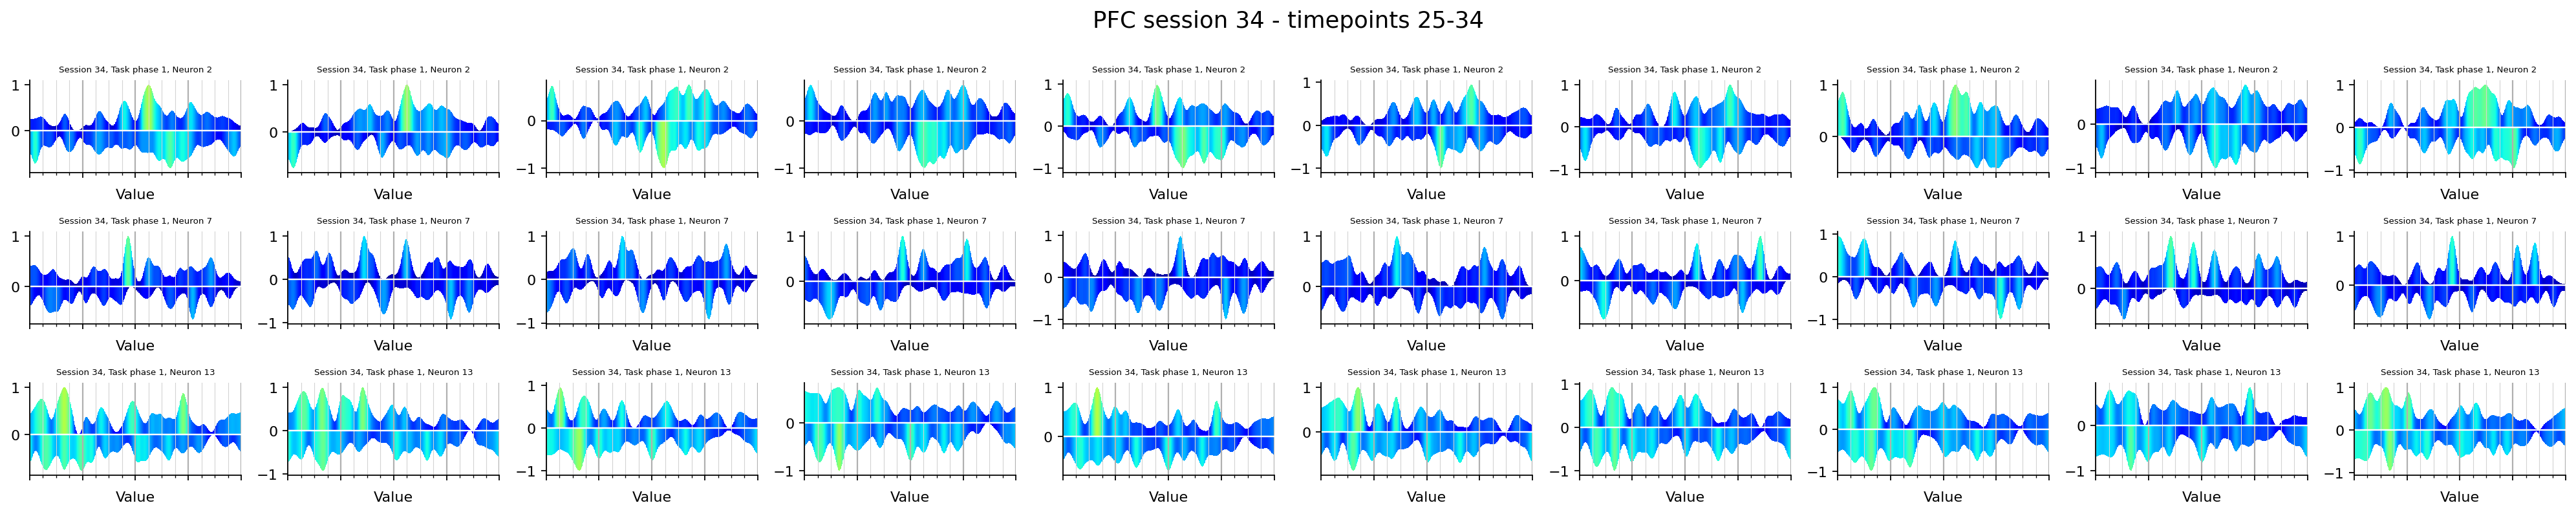

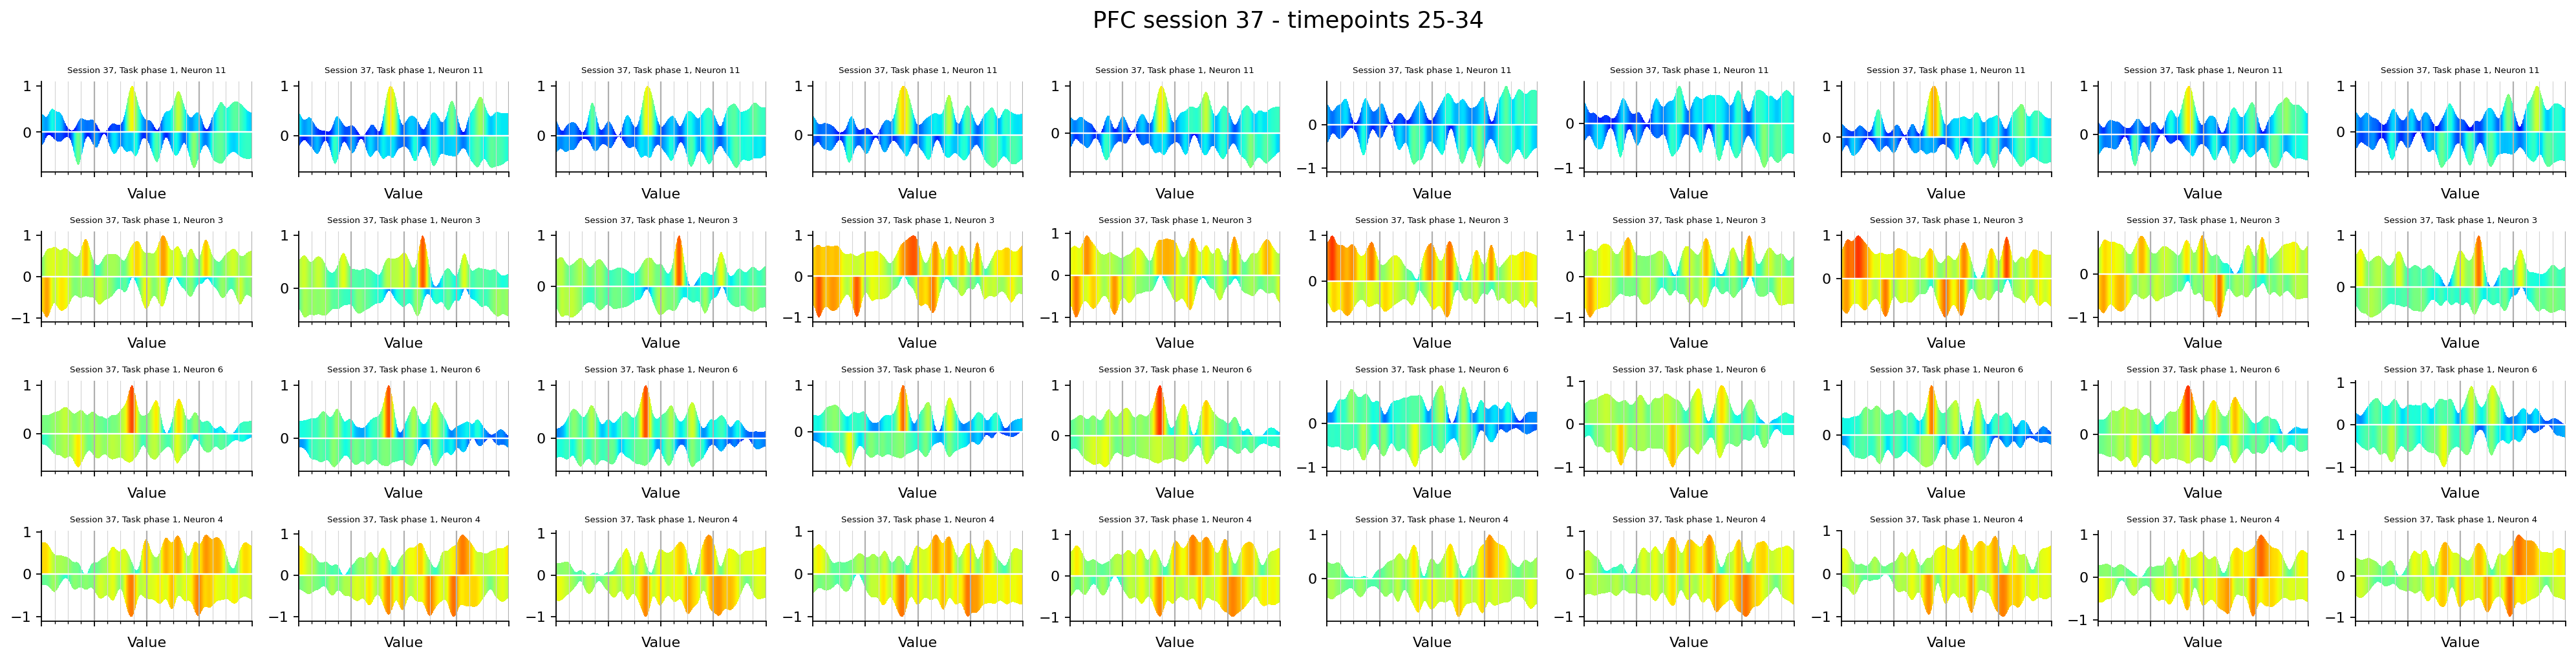

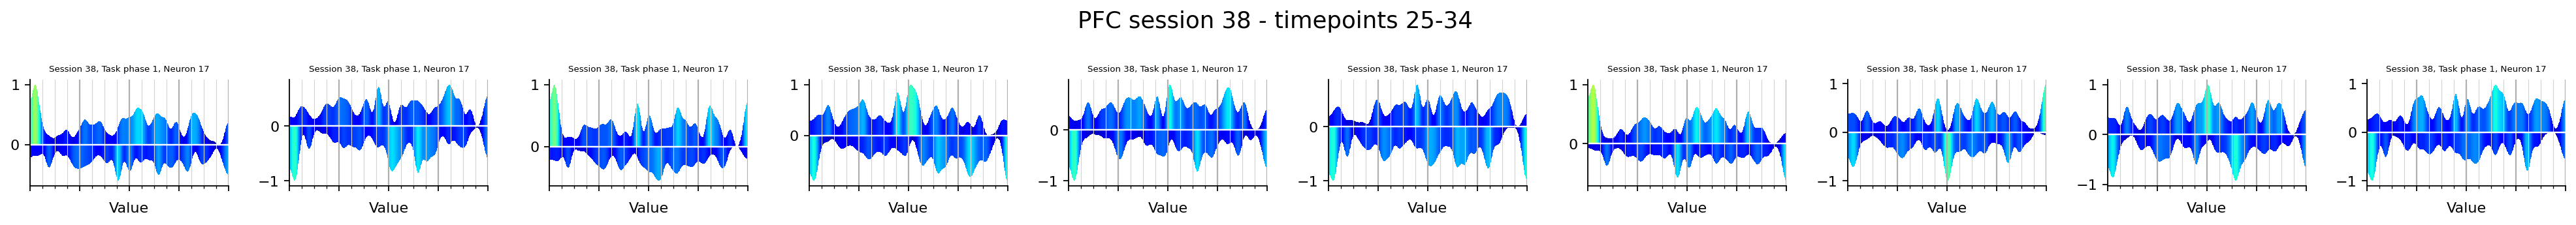

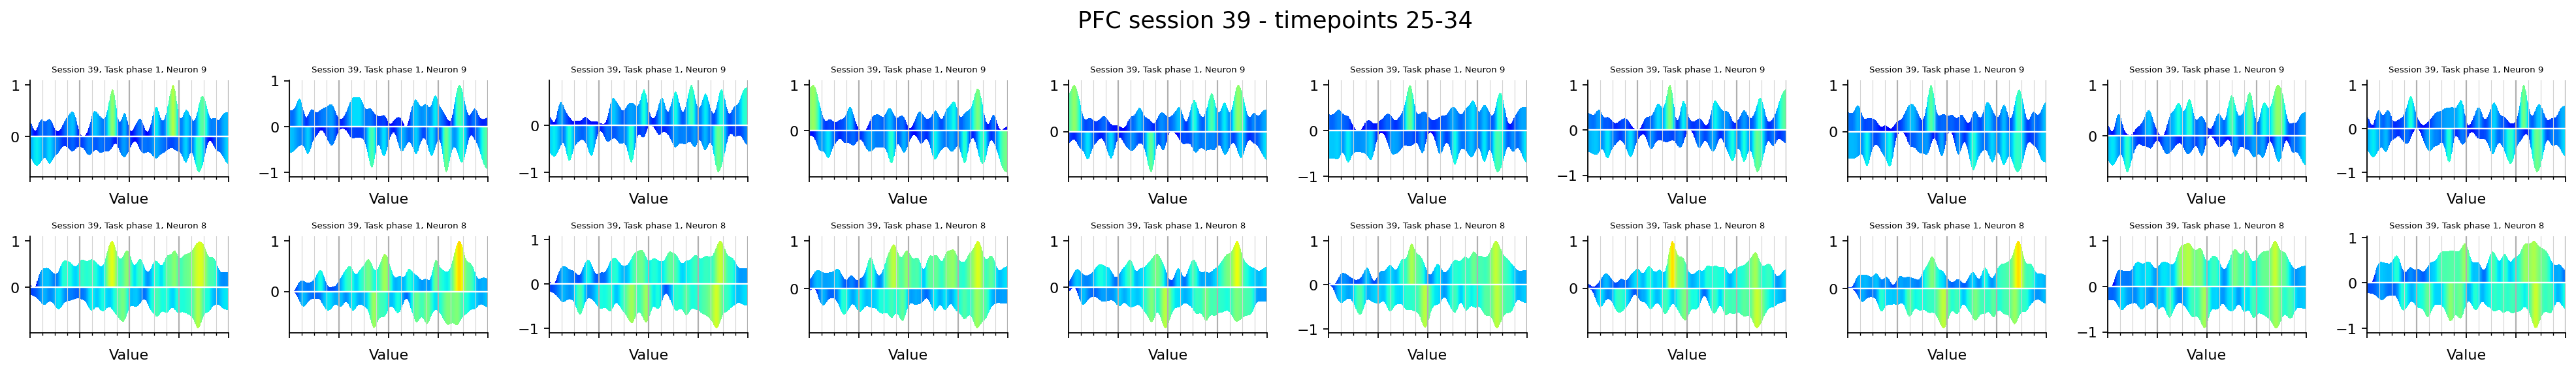

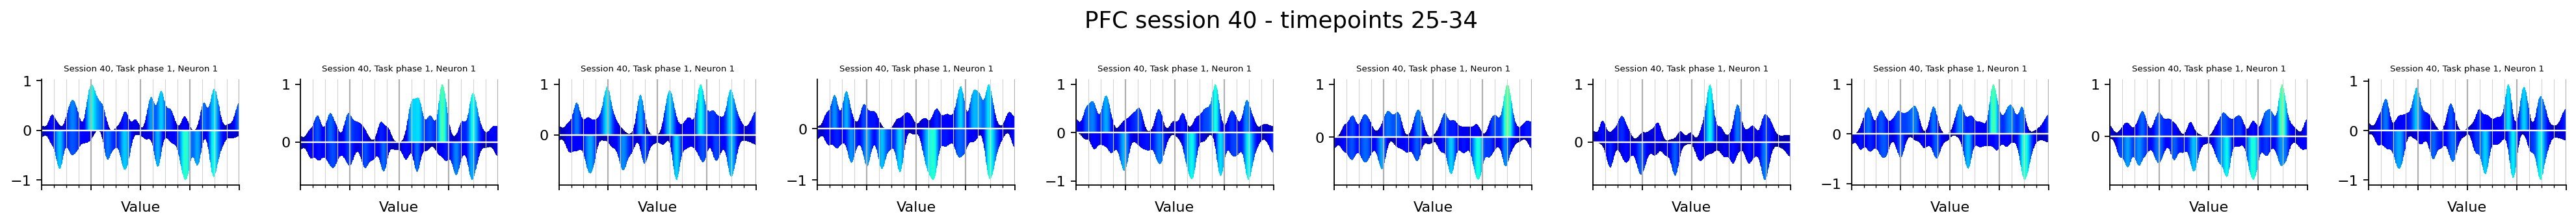

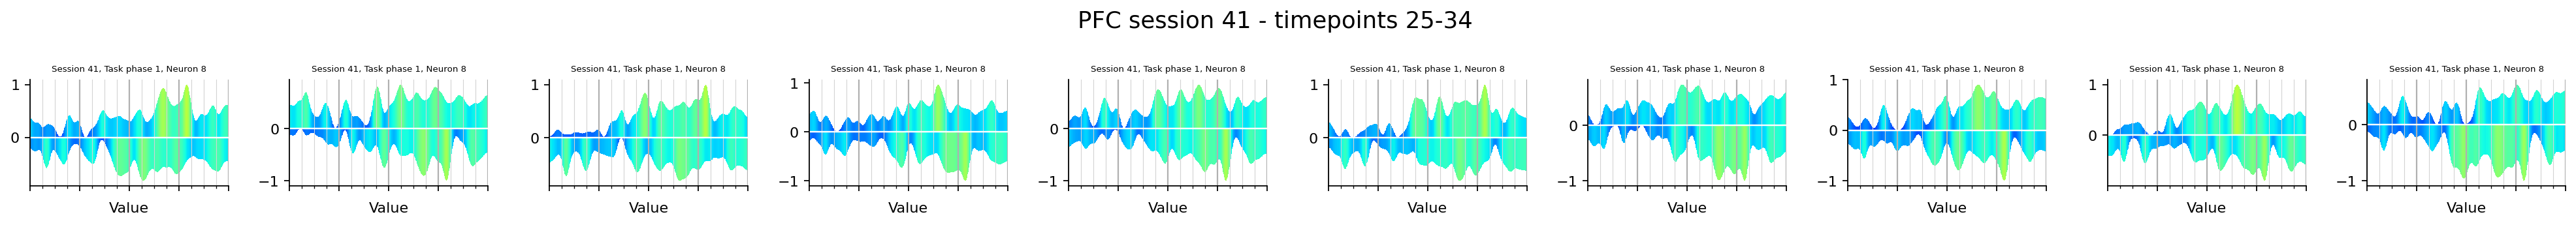

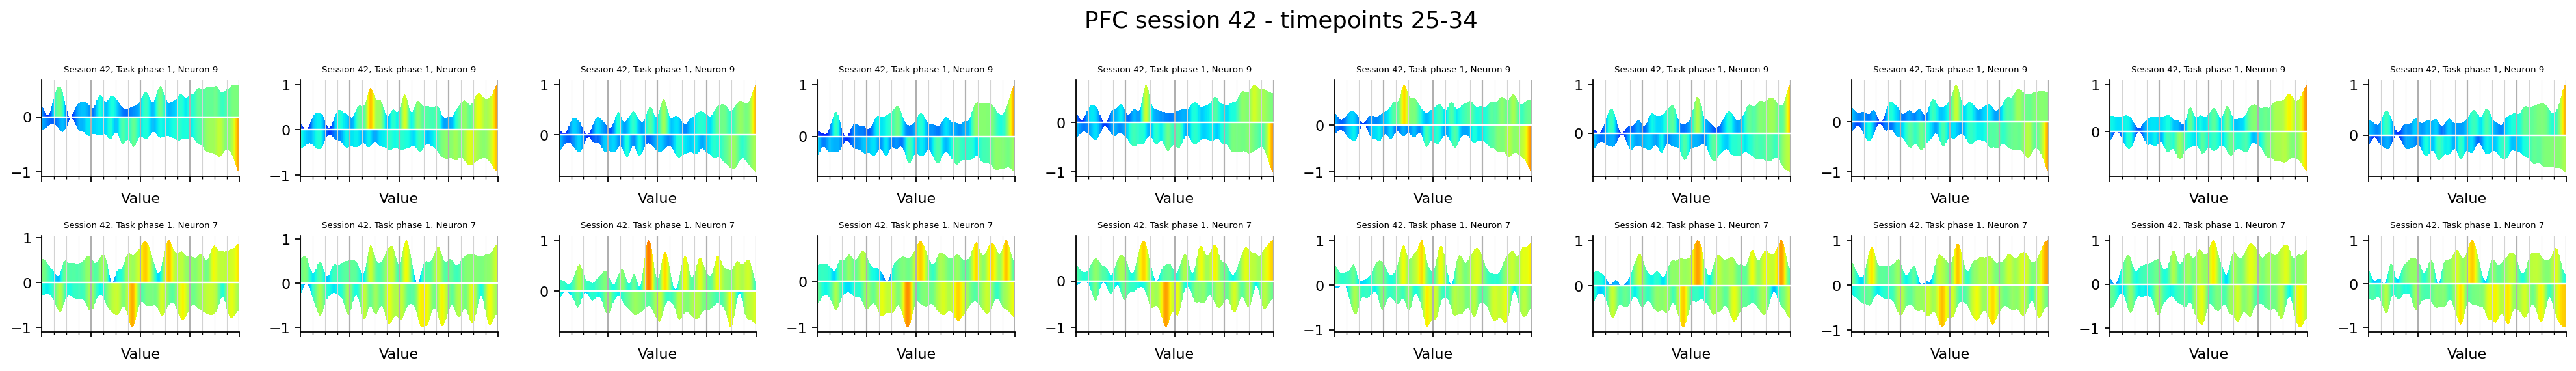

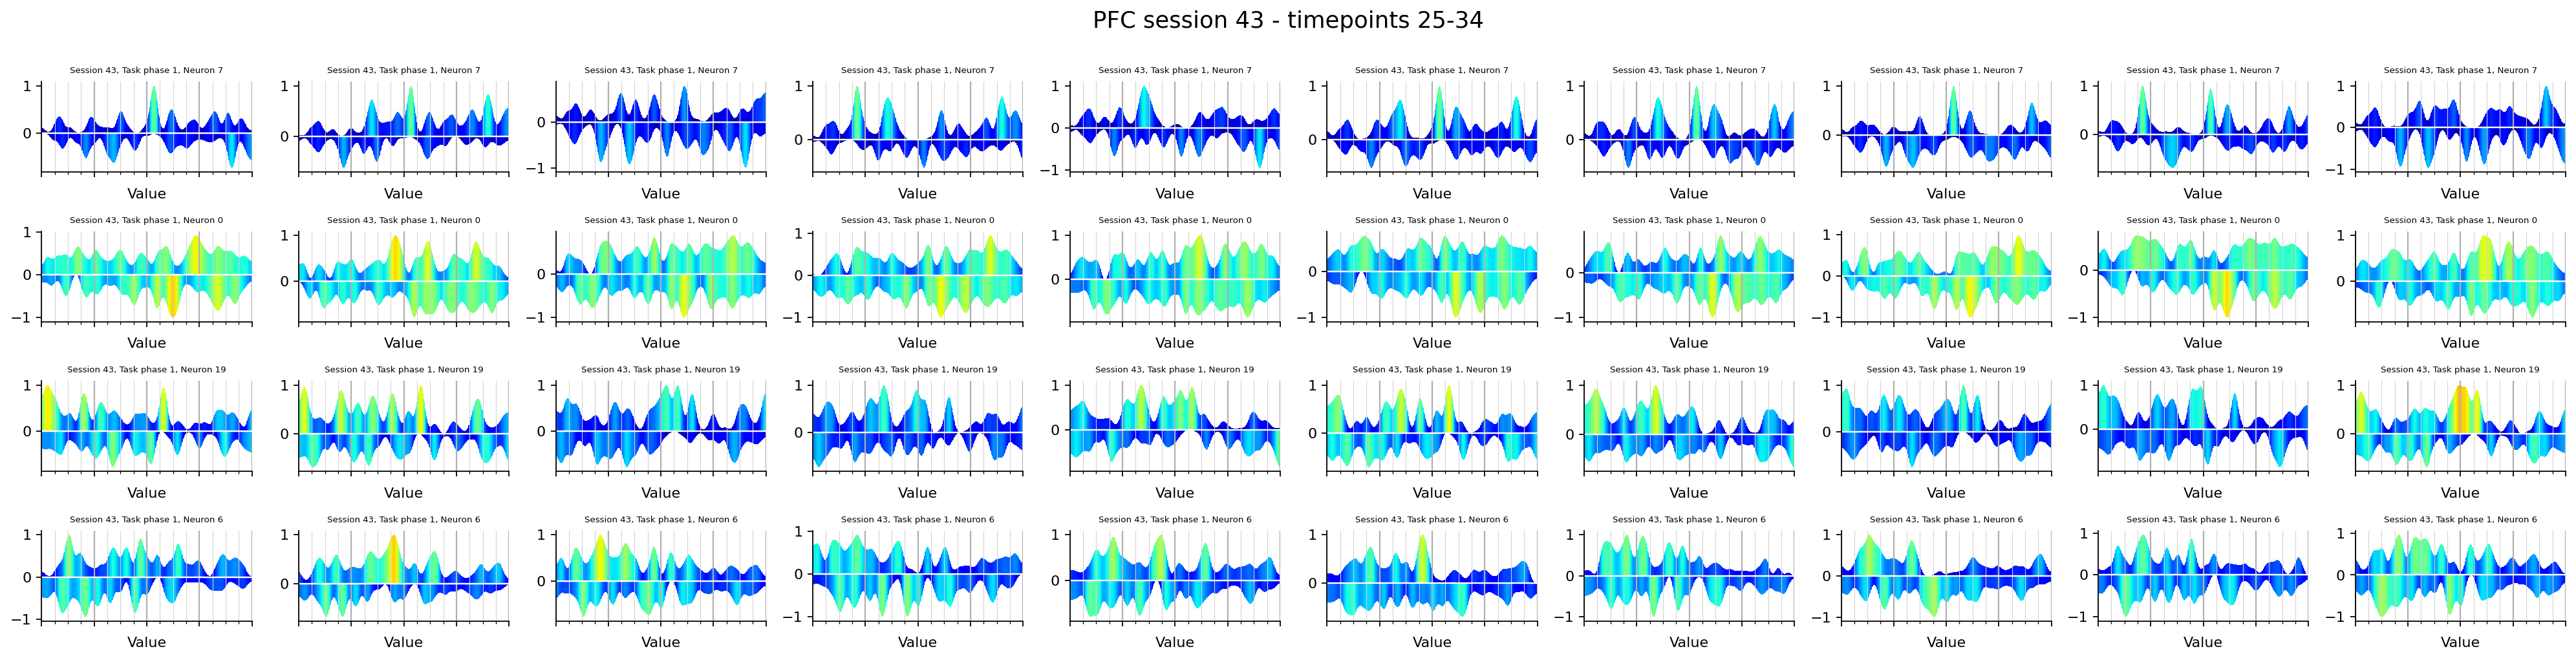

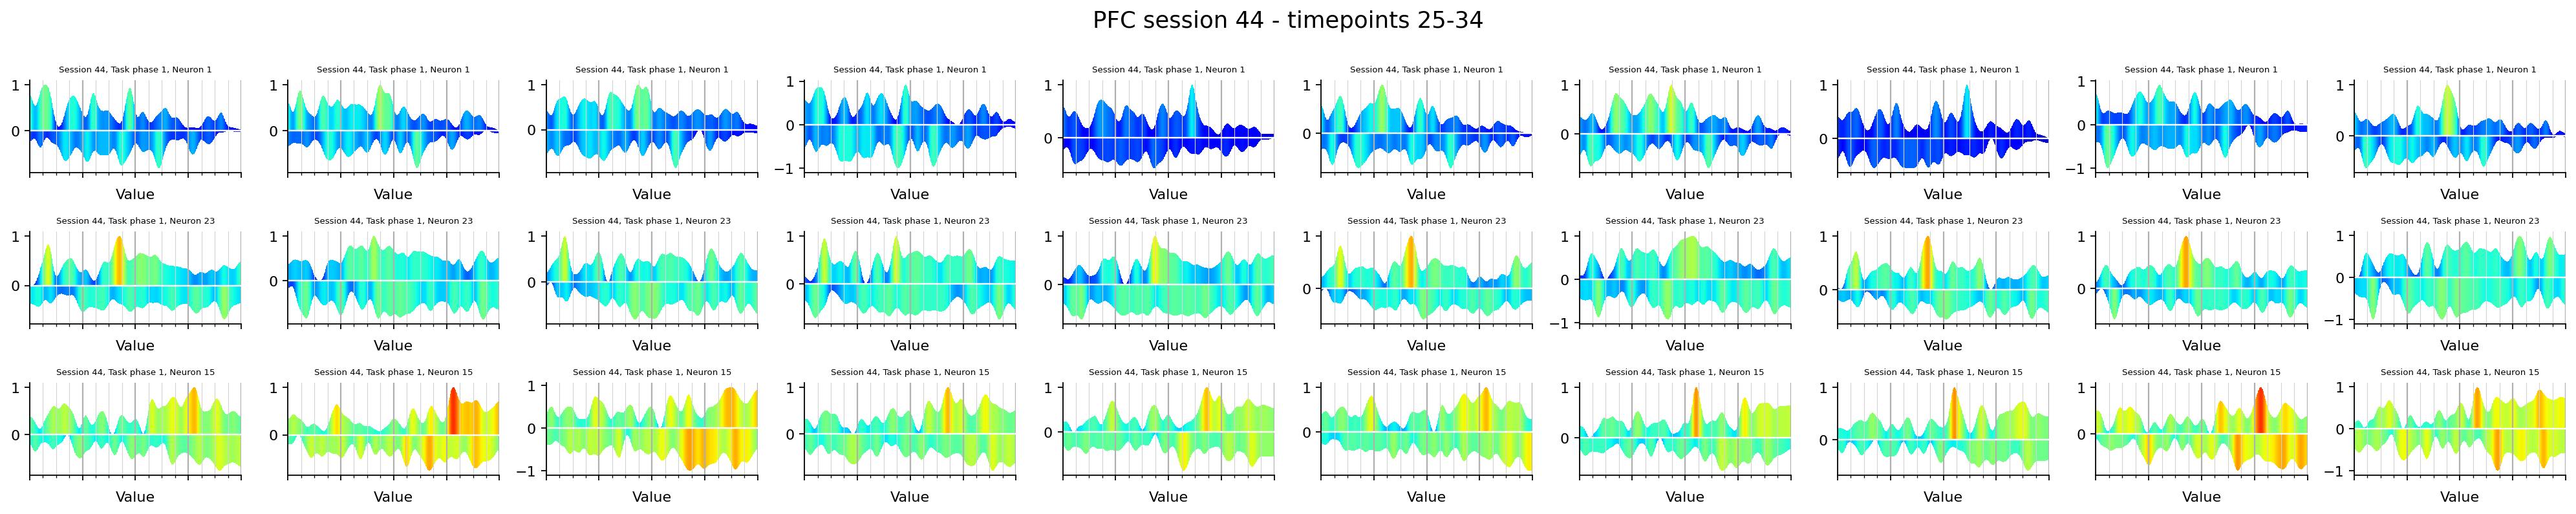

In [391]:
use_color = True
use_smoothed = True
sigma = 8
n_sample = 10
graph = True

n_p_bins = 100

save_dir = os.path.join('./analysis/neurons/grids/half/', f'phase_{str(phase)}', 'smoothed' if use_smoothed else 'raw', 'color' if use_color else 'bw', f'sigma_{sigma}', f'{n_p_bins}bins', 'test')
os.makedirs(save_dir, exist_ok=True)

sessions_neurons = [[3, [5]],
                    [8, [18]],
                    [11, [1]],
                    [13, [3]],
                    [14, [0]],
                    [15, [5]],
                    [25, [12]],
                    [33, [17]],
                    [34, [2,7,13]],
                    [37, [11, 3, 6, 4]],
                    [38, [17]],
                    [39, [9,8]],
                    [40, [1]],
                    [41, [8]],
                    [42, [9,7]],
                    [43, [7,0,19,6]],
                    [44, [1,23,15]]]

def plot_value_grid_panel(firing_by_bins_sessions, sessions_neurons, bin_edges, t, n_sample=4, plot_scatter=True):
    # cmap = plt.cm.get_cmap('viridis')
    cmap = plt.cm.get_cmap('jet')

    for session, neuron_ids in sessions_neurons:
        firing_by_bins = firing_by_bins_sessions[session]
        n_neurons = len(neuron_ids)
        fig, axes = plt.subplots(n_neurons, n_sample, figsize=(n_sample*2.5, 1.4*(0.5+n_neurons)), dpi=160)

        if len(t) > 1:
            fig.suptitle(f'PFC session {session} - timepoints {t[0]}-{t[-1]}', fontsize=16, y=1.005)
        else:
            fig.suptitle(f'PFC session {session} - timepoint {t}', fontsize=16)

        # axes[0].bar(np.arange(n_p_bins), sample, color='k', width=1, edgecolor='black')
        # axes[0].title.set_text(f'# Samples')
        # axes[0].set_xticks([0, (n_p_bins-1)/2, n_p_bins-1], [f'{b:.2f}' for b in [bin_edges[0], np.median(bin_edges), bin_edges[-1]]])
        # axes[0].set_xlim([-0.5, n_p_bins-0.5])

        for sample_id in range(n_sample):
            tuning_mean_1, tuning_mean_2 = get_tuning_half(firing_by_bins, t)
            tuning_means_both_halves = np.array([tuning_mean_1, tuning_mean_2])
            lower, upper = np.zeros(n_neurons), np.zeros(n_neurons)
            vmin, vmax = np.zeros(n_neurons), np.zeros(n_neurons)

            for k, tuning_mean_ in enumerate(tuning_means_both_halves):
                tuning_smoothed = smooth_upsample_tunings(tuning_mean_, factor=5, sigma=sigma)
                y = tuning_mean_ if not use_smoothed else tuning_smoothed
                for j, neuron_id in enumerate(neuron_ids):
                    print(session, j, neuron_id)
                    # vmin[j] = np.nanmin(y[neuron_id,:]) if vmin[j] == 0 else np.minimum(vmin[j], np.nanmin(y[neuron_id,:]))
                    # vmax[j] = np.nanmax(y[neuron_id,:]) if vmax[j] == 0 else np.maximum(vmax[j], np.nanmax(y[neuron_id,:]))
                    vmin[j] = np.nanmin(tuning_mean_[neuron_id,:]) if vmin[j] == 0 else np.minimum(vmin[j], np.nanmin(tuning_mean_[neuron_id,:]))
                    vmax[j] = np.nanmax(tuning_mean_[neuron_id,:]) if vmax[j] == 0 else np.maximum(vmax[j], np.nanmax(tuning_mean_[neuron_id,:]))
                    lower[j] = np.nanmin(y[neuron_id,:]) if lower[j] == 0 else np.minimum(lower[j], np.nanmin(y[neuron_id,:]))
                    upper[j] = np.nanmax(y[neuron_id,:]) if upper[j] == 0 else np.maximum(upper[j], np.nanmax(y[neuron_id,:]))

            for k, tuning_mean_ in enumerate(tuning_means_both_halves):
                tuning_smoothed = smooth_upsample_tunings(tuning_mean_, factor=5, sigma=sigma)
                y = tuning_mean_ if not use_smoothed else tuning_smoothed
                n_bins = y.shape[1]
            
                for j, neuron_id in enumerate(neuron_ids):
                    # vmin = np.nanmin(y[j,:]); vmax = np.nanmax(y[j,:])
                    ax = axes[j,sample_id] if len(neuron_ids) > 1 else axes[sample_id]
                    if graph:
                        for i in range(n_bins):
                            # col = cmap(i / n_p_bins)
                            col = cmap((y[neuron_id,i]-vmin[j])/(vmax[j]-vmin[j]))
                            # axes[port, step].scatter(x_comp[i, dims[0]], i, c=col, s=7, marker='o', label=i)
                            # axes[j+1].bar(i, np.mean(tuning_mean[j, t, i]), color=col, width=1, edgecolor='black')
                            direc = 1 if k==0 else -1
                            # ax.bar(i, y[neuron_id,i], color=col, width=1, edgecolor='black' if not use_color else 'none')
                            ax.bar(i, direc*(y[neuron_id,i]-lower[j])/(upper[j]-lower[j]), color=col, width=1, edgecolor='black' if not use_color else 'none')

                            if plot_scatter:
                                w=0.25
                                n_scatter = sample[i]
                                print(len(scatter[i][neuron_id]), sample[i])
                                if n_scatter > 0:
                                    ax.scatter(i * np.ones(n_scatter) + - w/2 + w*np.random.random(n_scatter), scatter[i][neuron_id], c='k', s=0.25, edgecolors='none')
                    else:
                        ax.imshow(y[neuron_id,:][np.newaxis,:], cmap=cmap, aspect='auto', extent=[0, n_bins-1, 0, 1], vmin=vmin[j], vmax=vmax[j])
                    # axes[i].bar(np.arange(timepoints), tuning_mean[i, t, :], width=1)
                    # q: add error bars using tuning_std
                    # axes[j+1].errorbar(np.arange(timepoints), tuning_mean[j, t, :], yerr=tuning_std[j, t, :], linestyle='', color='k', capsize=2, elinewidth=1, capthick=1)
                    # axes[j+1].errorbar(np.arange(timepoints), tuning_mean_[j, :], yerr=tuning_std_[j, :], linestyle='', color='k', capsize=2, elinewidth=1, capthick=1)
                    ax.set_title(f'Session {session}, Task phase {phase}, Neuron {neuron_id}', fontsize=6)
                    # if j == n_neurons-1:
                    ax.xaxis.grid(True, which='minor', color='lightgrey', linewidth=0.5)
                    ax.xaxis.grid(True, which='major', linewidth=1)
                    
                    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
                    ax.xaxis.set_major_locator(MultipleLocator(n_bins/4))
                    ax.xaxis.set_minor_locator(MultipleLocator(n_bins/16))

                    # q = 8
                    # xticks = [ii * (n_bins-1)/q for ii in range(q+1)]
                    # xtick_labels = [f'{b:.2f}' for b in [np.quantile(bin_edges, ii/q) for ii in range(q+1)]]
                    # axes[j,k].set_xticks(xticks, xtick_labels)
                    ax.set_xticklabels([])
                    ax.set_xlabel('Value')
                    ax.axhline(0, color='white', linewidth=1)
                    # if graph: ax.set_ylim(bottom=0.95*lower[j], top=1.05*upper[j])
                    # else:
                        # axes[j].xaxis.set_visible(False)
                        # axes[j+1].set_xticks([0, (n_p_bins-1)/2, n_p_bins-1], [])
                    ax.set_xlim([-0, n_bins-0])
                    # q: how do I remove top and right axis splines?
                    ax.spines['top'].set_visible(False)
                    ax.spines['right'].set_visible(False)

        plt.tight_layout()
        fig.savefig(os.path.join(save_dir, f'session{session}.png'), dpi=300)
        # plt.close()

plot_value_grid_panel(firing_by_bins_sessions, sessions_neurons, bin_edges, t=t, n_sample=n_sample, plot_scatter=False)

In [395]:
tuning_smoothed.shape

NameError: name 'tuning_smoothed' is not defined

In [ ]:
# t = np.arange(0,20)
# n_fig = 20

# def plot_value_grid(tuning_means, tuning_stds, samples, bin_edges, n_fig=1, t=[35]):
#     cmap = plt.cm.get_cmap('viridis')

#     for session, (tuning_mean, tuning_std, sample, firing_by_bins) in enumerate(zip(tuning_means[:n_fig], tuning_stds[:n_fig], samples[:n_fig], firing_by_bins_sessions[:n_fig])):
#         n_neurons = tuning_mean.shape[0]; timepoints = tuning_mean.shape[2]
#         fig, axes = plt.subplots(1+n_neurons, 1, figsize=(6, 1.2*(1+n_neurons)), dpi=160)

#         if len(t) > 1:
#             fig.suptitle(f'PFC session {session} - timepoints {t[0]}-{t[-1]}', fontsize=16)
#         else:
#             fig.suptitle(f'PFC session {session} - timepoint {t}', fontsize=16)

#         axes[0].bar(np.arange(n_p_bins), sample, color='gray', width=1, edgecolor='black')
#         axes[0].title.set_text(f'# Samples')
#         axes[0].set_xticks([0, (n_p_bins-1)/2, n_p_bins-1], [f'{b:.2f}' for b in [bin_edges[0], np.median(bin_edges), bin_edges[-1]]])
#         axes[0].set_xlim([-0.5, n_p_bins-0.5])

#         tuning_mean_, tuning_std_ = get_tuning(firing_by_bins, t)
#         for j in range(n_neurons):
#             for i in range(n_p_bins):
#                 col = cmap(i / n_p_bins)
#                 # axes[port, step].scatter(x_comp[i, dims[0]], i, c=col, s=7, marker='o', label=i)
#                 # axes[j+1].bar(i, np.mean(tuning_mean[j, t, i]), color=col, width=1, edgecolor='black')
#                 axes[j+1].bar(i, tuning_mean_[j,i], color=col, width=1, edgecolor='black')
#             # axes[i].bar(np.arange(timepoints), tuning_mean[i, t, :], width=1)
#             # q: add error bars using tuning_std
#             # axes[j+1].errorbar(np.arange(timepoints), tuning_mean[j, t, :], yerr=tuning_std[j, t, :], linestyle='', color='k', capsize=2, elinewidth=1, capthick=1)
#             # axes[j+1].errorbar(np.arange(timepoints), tuning_mean_[j, :], yerr=tuning_std_[j, :], linestyle='', color='k', capsize=2, elinewidth=1, capthick=1)
#             axes[j+1].set_ylim(bottom=0)
#             axes[j+1].title.set_text(f'Neuron {j}')
#             if j == n_neurons-1:
#                 axes[j+1].set_xticks([0, (n_p_bins-1)/2, n_p_bins-1], [f'{b:.2f}' for b in [bin_edges[0], np.median(bin_edges), bin_edges[-1]]])
#             else:
#                 # axes[j].xaxis.set_visible(False)
#                 axes[j+1].set_xticks([0, (n_p_bins-1)/2, n_p_bins-1], [])
#             axes[j+1].set_xlim([-0.5, n_p_bins-0.5])

#         plt.tight_layout()

# plot_value_grid(tuning_means, tuning_stds, samples, bin_edges, n_fig=n_fig, t=t)

[-1.30513063 -1.25075018 -1.19636974 -1.1419893  -1.08760886 -1.03322841
 -0.97884797 -0.92446753 -0.87008709 -0.81570664 -0.7613262  -0.70694576
 -0.65256531 -0.59818487 -0.54380443 -0.48942399 -0.43504354 -0.3806631
 -0.32628266 -0.27190221 -0.21752177 -0.16314133 -0.10876089 -0.05438044
  0.          0.05438044  0.10876089  0.16314133  0.21752177  0.27190221
  0.32628266  0.3806631   0.43504354  0.48942399  0.54380443  0.59818487
  0.65256531  0.70694576  0.7613262   0.81570664  0.87008709  0.92446753
  0.97884797  1.03322841  1.08760886  1.1419893   1.19636974  1.25075018
  1.30513063]
[-1.30513063 -1.25075018 -1.19636974 -1.1419893  -1.08760886 -1.03322841
 -0.97884797 -0.92446753 -0.87008709 -0.81570664 -0.7613262  -0.70694576
 -0.65256531 -0.59818487 -0.54380443 -0.48942399 -0.43504354 -0.3806631
 -0.32628266 -0.27190221 -0.21752177 -0.16314133 -0.10876089 -0.05438044
  0.          0.05438044  0.10876089  0.16314133  0.21752177  0.27190221
  0.32628266  0.3806631   0.43504354  0

/var/folders/lv/jc4t_z1d75n6dp1c2sbbc9xc0000gn/T/ipykernel_1547/3453264138.py:40: RuntimeWarning: invalid value encountered in divide
  transition_matrix = counts / counts.sum(axis=1, keepdims=True)
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jo/miniforge3/envs/notebooks_paper/lib/python3.11/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


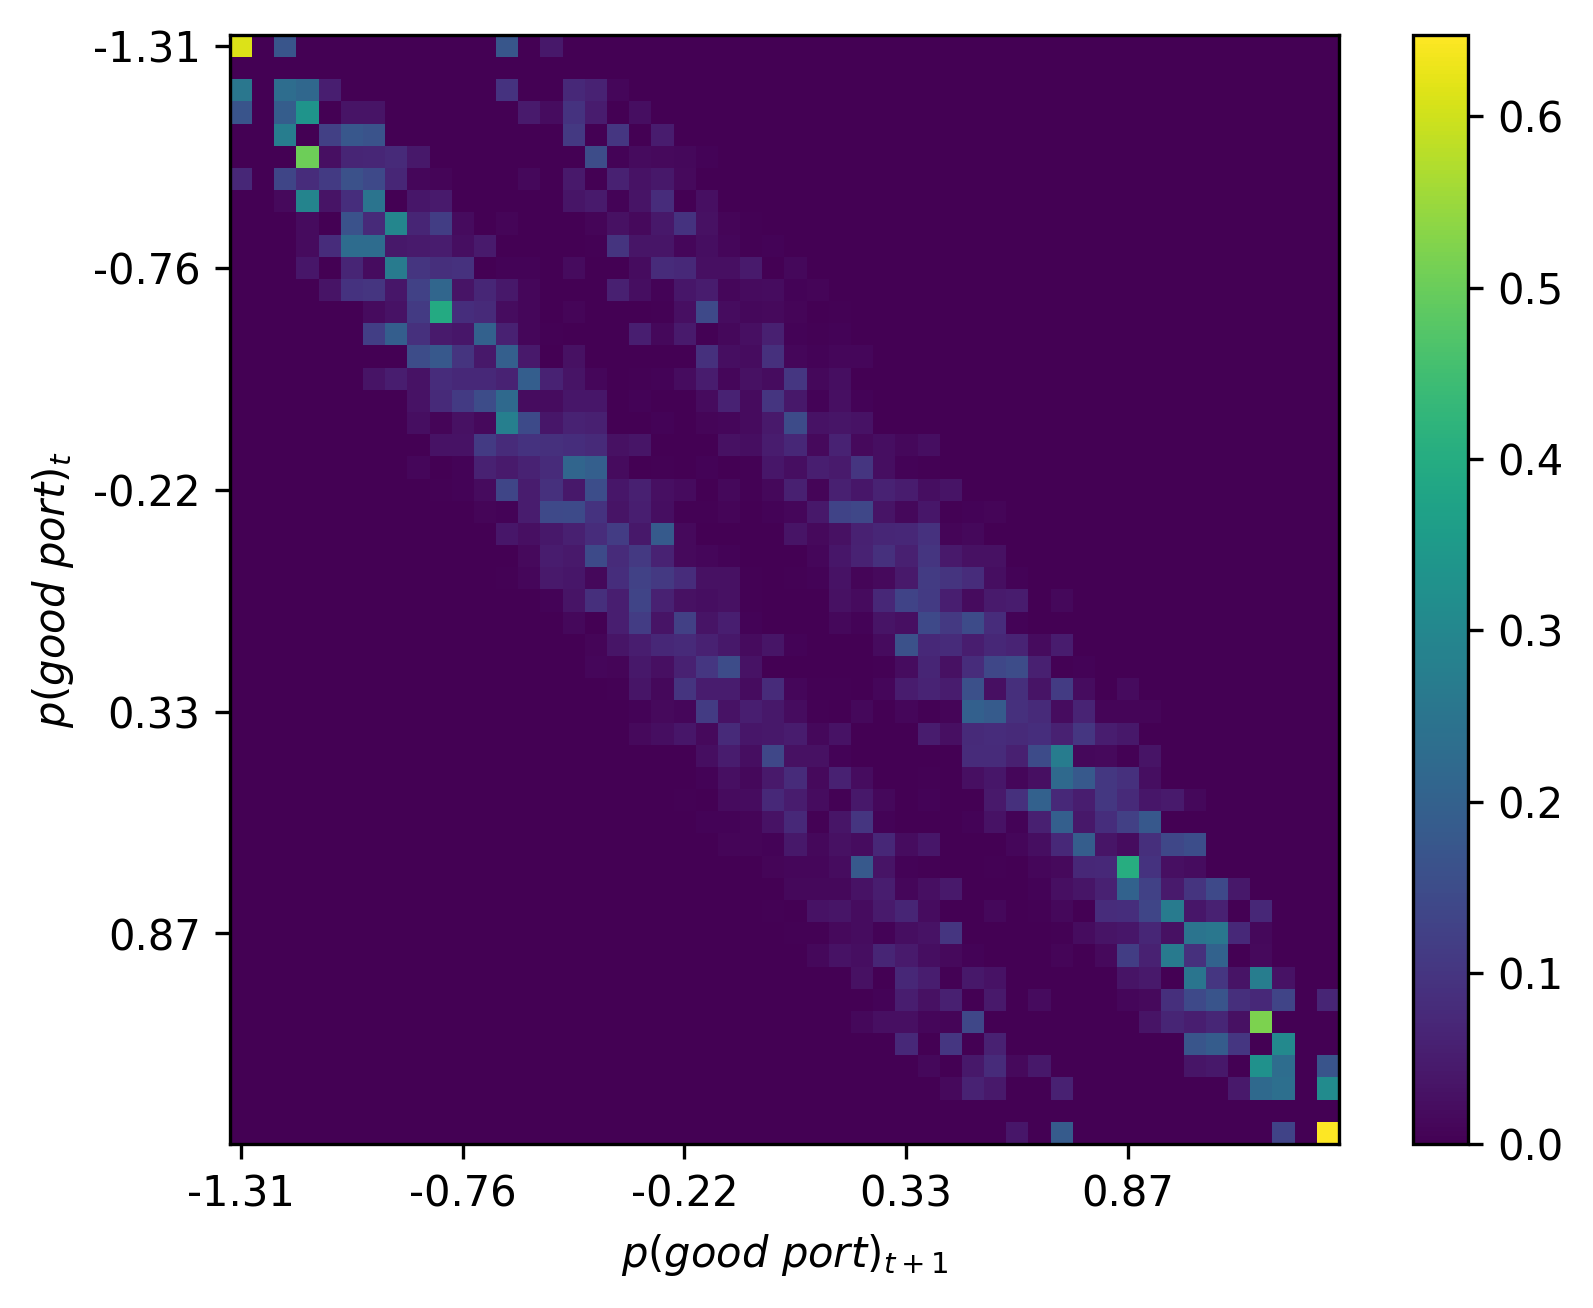

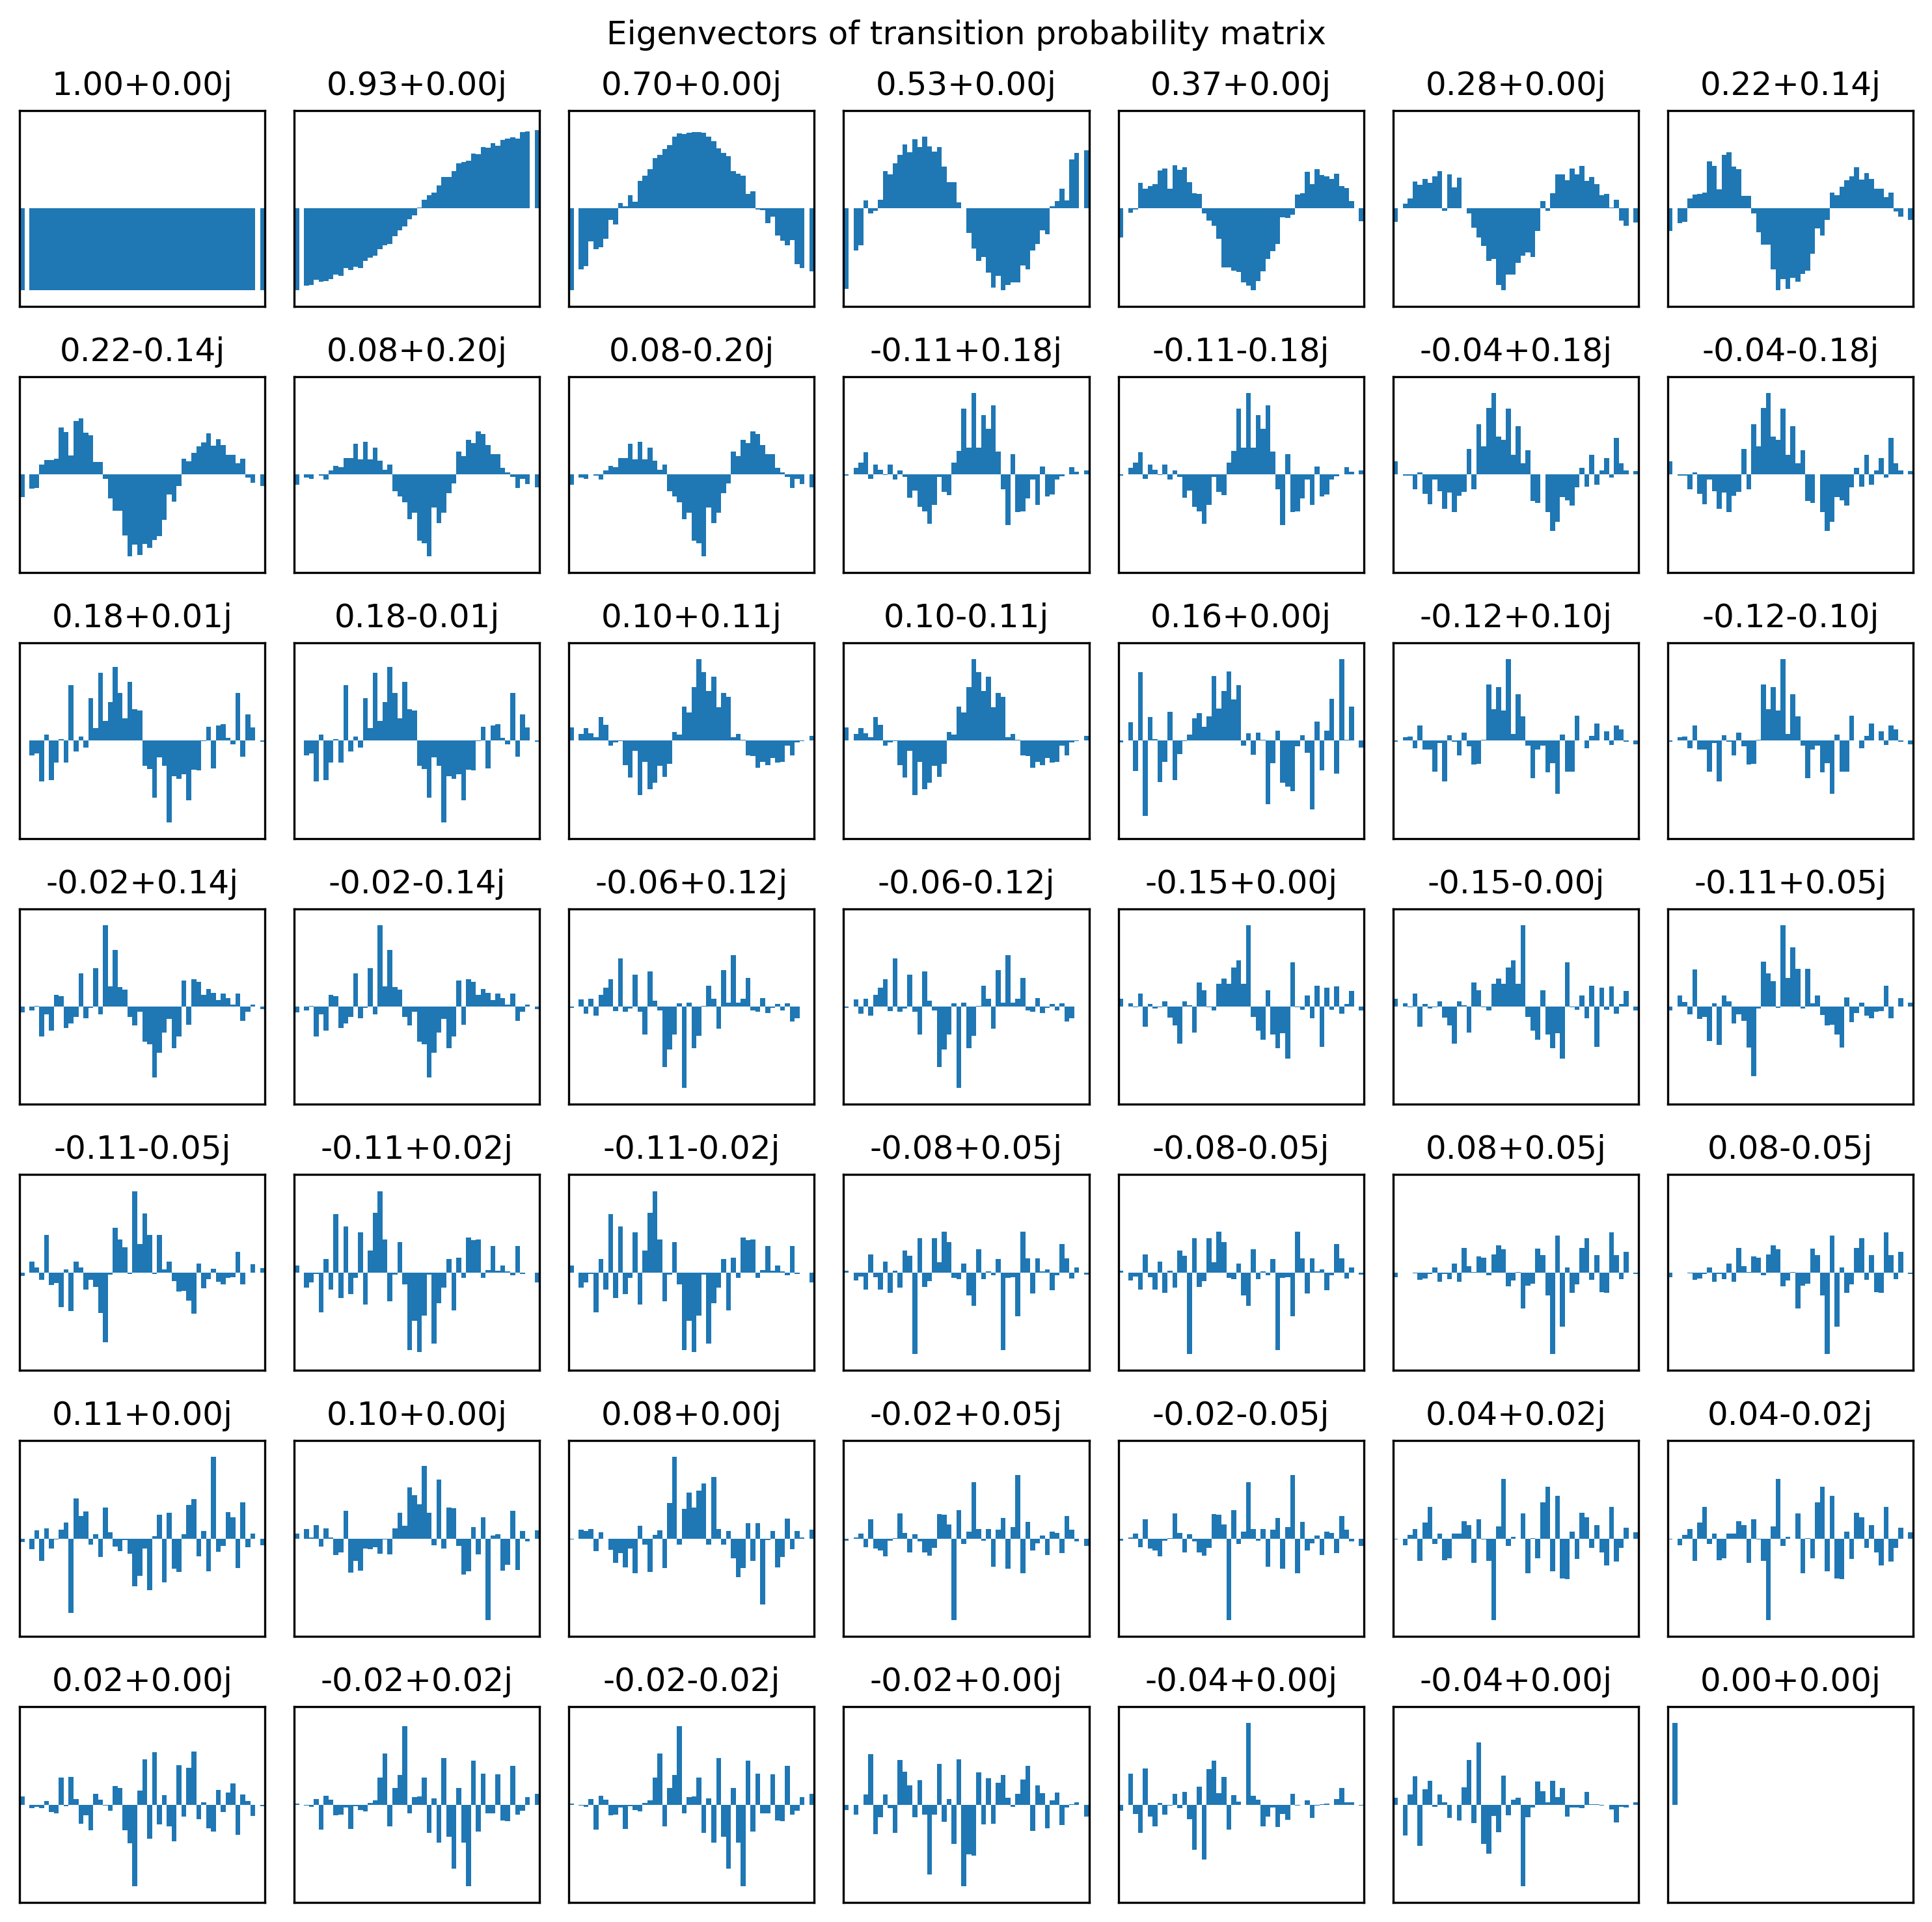

In [405]:
# how to get a transition matrix from this series of numbers?
import numpy as np
from scipy.sparse import csr_matrix
from scipy.stats import logistic

use_tm = True
use_sig = False
fold = False

n_p_bins = 50

counts = []
for v in values:
    if use_sig: 
        belief = logistic.cdf(v)
        if fold: belief = 0.5 + np.abs(belief - 0.5)
        lims = [0, 1] if not fold else [0.5, 1]
        bin_edges = np.linspace(lims[0], lims[1], n_p_bins+1)[1:-1]  # Creates 5 edges for 4 bins
        bins = np.digitize(belief, bin_edges)
    else:
        if fold: v = np.abs(v)
        lims = [-np.max(np.abs(v)), np.max(np.abs(v))] if not fold else [0, np.max(np.abs(v))]
        bin_edges = np.linspace(lims[0], lims[1], n_p_bins+1)[1:-1]  # Creates 5 edges for 4 bins
        bins = np.digitize(v, bin_edges)

    print(bin_edges)
    # Number of unique states
    bins = bins.flatten()
    num_states = n_p_bins

    # Collect transitions
    rows = bins[:-1]; cols = bins[1:]
    # print(np.max(rows), np.max(cols), num_states)
    # Count transitions using a sparse matrix
    count = csr_matrix((np.ones(len(rows)), (rows, cols)), shape=(num_states, num_states)).toarray()
    counts.append(count)
# Normalize to get probabilities
    
counts = np.sum(counts, axis=0)
transition_matrix = counts / counts.sum(axis=1, keepdims=True)
transition_matrix[np.isnan(transition_matrix)] = 0

M = transition_matrix if use_tm else counts
plt.figure(dpi=300)
plt.imshow(M)
plt.xticks(np.arange(0, n_p_bins, 10), [f'{b:.2f}' for b in bin_edges[::10]])
plt.yticks(np.arange(0, n_p_bins, 10), [f'{b:.2f}' for b in bin_edges[::10]])
plt.ylabel(r'$p(good\ port)_{t}$')
plt.xlabel(r'$p(good\ port)_{t+1}$')
# plt.xlim(lims); plt.ylim(lims)
plt.colorbar()

eigenvalues, eigenvectors = np.linalg.eig(M if use_tm else M / np.max(M))

print(eigenvectors.shape)
n = 49
fig, axes = plt.subplots(7,7, figsize=(10,10), dpi=300)
fig.suptitle('Eigenvectors of transition probability matrix' if use_tm else 'Eigenvectors of transition counts matrix')
for i, ax in enumerate(axes.flatten()):
    v = eigenvectors[:, i]
    ax.bar(np.arange(len(v)), v, width=1)
    ax.set_ylim([-1.2*np.max(np.abs(v)), 1.2*np.max(np.abs(v))])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(f'{eigenvalues[i]:.2f}')
    ax.set_xlim([-0.5, n_p_bins-0.5])

plt.tight_layout()